#Install Libraries

In [2]:
! pip install --upgrade --quiet category_encoders

     |████████████████████████████████| 82 kB 310 kB/s 


In [3]:
! pip install --upgrade --quiet pingouin

     |████████████████████████████████| 182 kB 5.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 28.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#Import packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

#Read Clean Dataset Pre Facto Features

In [5]:
clean_df= pd.read_csv('/content/drive/MyDrive/Capstone Project/Data Files/Bank Loan Default_CleanBaseLine_v3.0.csv')
clean_df.shape
clean_df.info()
clean_df.info()
clean_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   member_id        119145 non-null  int64  
 1   loan_amnt        119145 non-null  int64  
 2   funded_amnt      119145 non-null  int64  
 3   funded_amnt_inv  119145 non-null  float64
 4   term             119145 non-null  object 
 5   int_rate         119145 non-null  float64
 6   installment      119145 non-null  float64
 7   grade            119145 non-null  object 
 8   emp_length       119145 non-null  int64  
 9   home_ownership   119145 non-null  object 
 10  annual_inc       119145 non-null  float64
 11  purpose          119145 non-null  object 
 12  addr_state       119145 non-null  object 
 13  dti              119145 non-null  float64
 14  open_acc         119145 non-null  int64  
 15  revol_bal        119145 non-null  int64  
 16  revol_util       119145 non-null  floa

member_id          0
loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
int_rate           0
installment        0
grade              0
emp_length         0
home_ownership     0
annual_inc         0
purpose            0
addr_state         0
dti                0
open_acc           0
revol_bal          0
revol_util         0
total_acc          0
loan_status        0
dtype: int64

#Statistical Analysis of Dataset

In [6]:
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
table_cat = ff.create_table(clean_df.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

In [7]:
table_cat = ff.create_table(clean_df.describe(include=[np.number]).T, index=True, index_title='Numerical columns')
iplot(table_cat)

In [8]:
clean_df.describe(include=[np.object])

term   grade  ... addr_state loan_status
count       119145  119145  ...     119145      119145
unique           2       7  ...         50           2
top      36 months       B  ...         CA  Fully Paid
freq         98567   41450  ...      20891      115862

[4 rows x 6 columns]

#Target Variable 

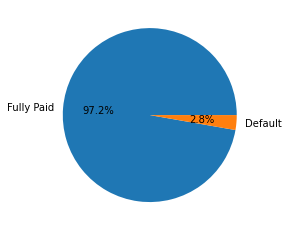

In [9]:
array=clean_df.loan_status.value_counts()
tag =['Fully Paid', 'Default']
plt.pie(array, labels=tag, autopct='%1.1f%%')
plt.show()

#Univariate Numerical types

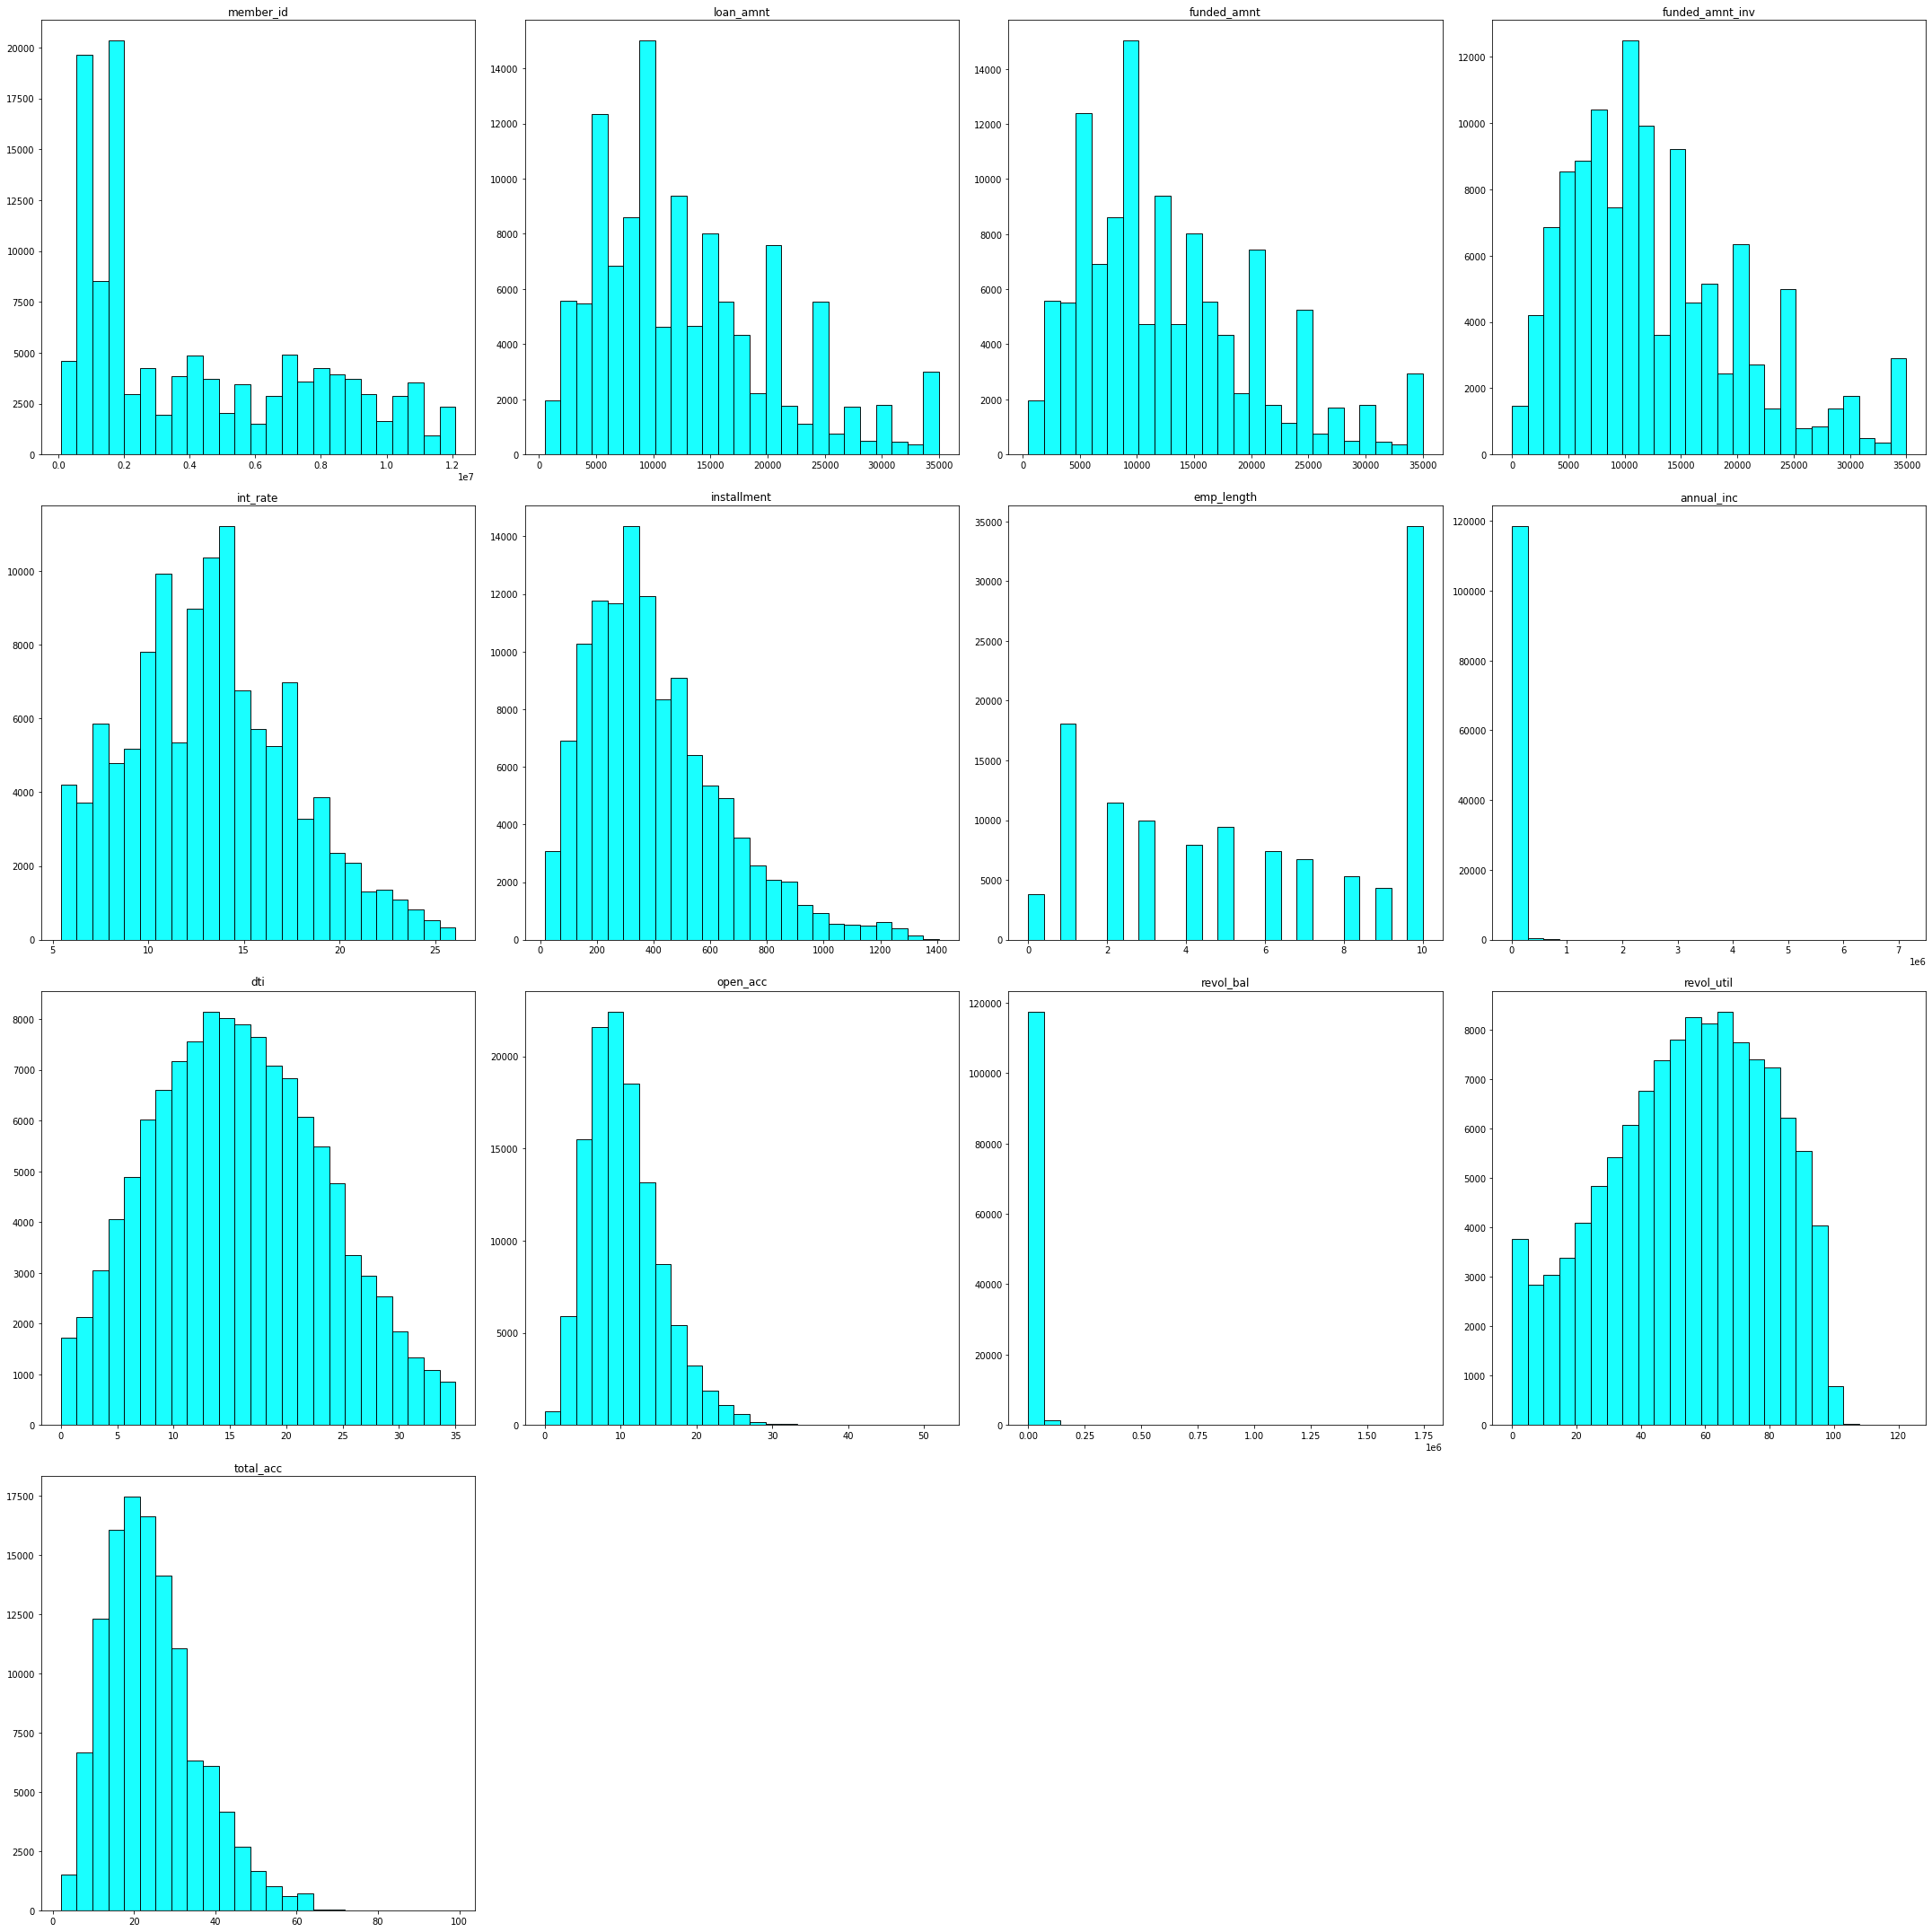

In [10]:
clean_df.hist(figsize=(30,30), bins=25, 
              edgecolor="black", color="cyan" , 
              xlabelsize=10, ylabelsize=10, 
              alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

#Visualize Categorical Data elements

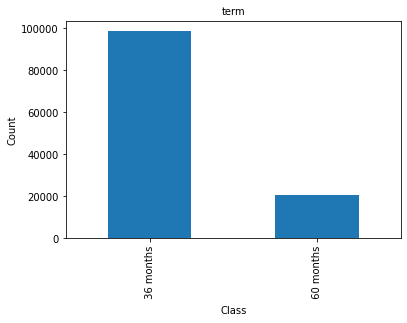

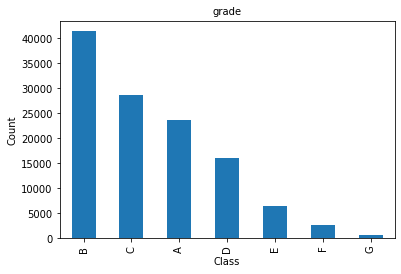

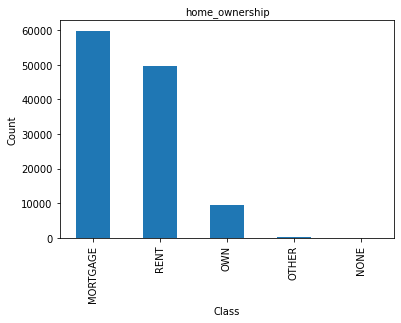

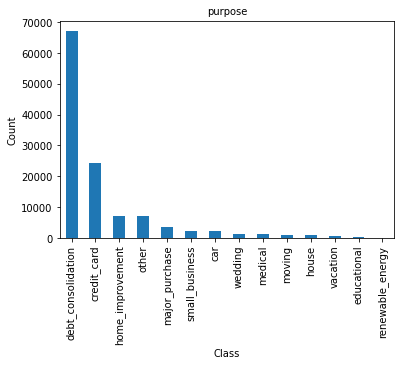

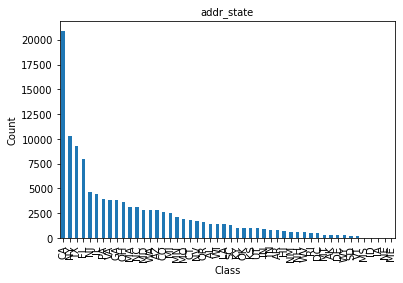

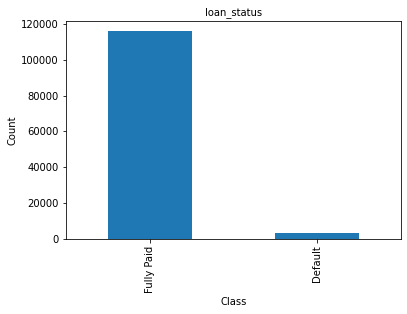

In [11]:
##plt.rcParams['figure.figsize'] = [10, 10]
for col in clean_df.select_dtypes(include=["object"]).columns:
    clean_df[col].value_counts().plot(kind="bar")
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="center")
    plt.show()

#Box Plot

#Box Plot Methods

In [12]:
# Boxplot + Hist chart
def boxhist(x):
    variable = clean_df[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=12, loc="center")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



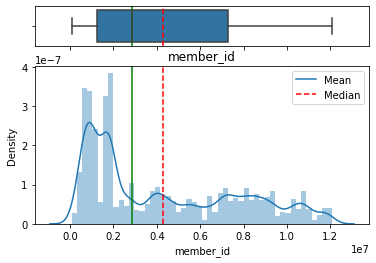

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



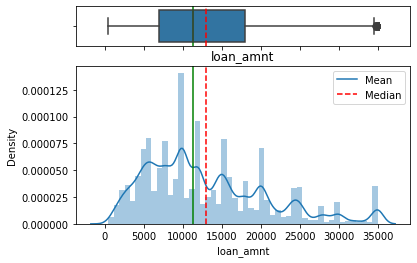

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



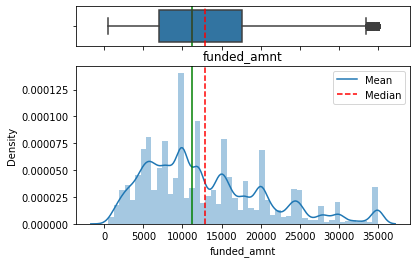

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



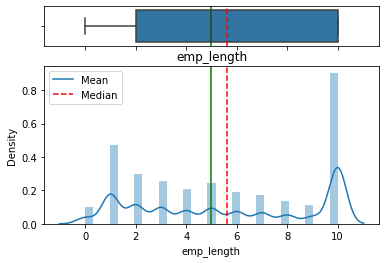

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



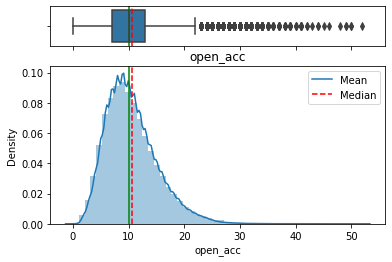

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



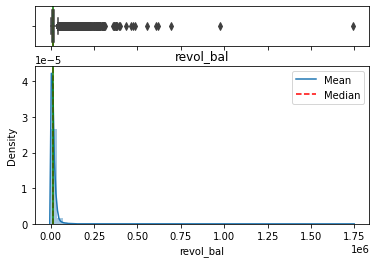

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



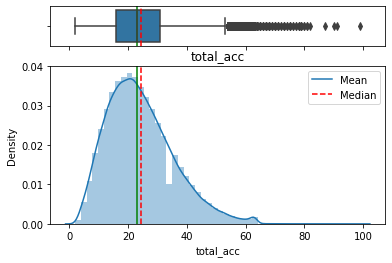

In [13]:
for col in clean_df.select_dtypes(include=["int64"]).columns :
    boxhist(col)

#Mutivariate Analysis Pivot Chart Methods

In [14]:
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = clean_df.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(15,5),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = clean_df.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(15,5),fontsize = 12);

#Create Permutations of combinations of categorical variables

term            36 months    60 months
loan_status                           
Default       15236432186   8180896202
Fully Paid   397594274490  89950910360

grade                  A             B  ...            F           G
loan_status                             ...                         
Default       1087431447    5982547068  ...   1274276384   325188335
Fully Paid   79546571235  172032250607  ...  11891250329  2453951224

[2 rows x 7 columns]

home_ownership      MORTGAGE        NONE  ...           OWN          RENT
loan_status                               ...                            
Default         1.082086e+10         NaN  ...  2.231139e+09  1.036533e+10
Fully Paid      2.612470e+11  85217003.0  ...  3.964138e+10  1.864610e+11

[2 rows x 5 columns]

purpose               car   credit_card  ...      vacation       wedding
loan_status                              ...                            
Default      8.052746e+07  4.819681e+09  ...  9.508553e+07  5.610403e+07
Fully Paid   5.138854e+09  1.119207e+11  ...  2.375371e+09  2.986376e+09

[2 rows x 14 columns]

addr_state             AK            AL  ...            WV            WY
loan_status                              ...                            
Default      3.595920e+07  2.881699e+08  ...  1.133313e+08  4.267060e+07
Fully Paid   1.451803e+09  5.567030e+09  ...  2.372885e+09  1.189964e+09

[2 rows x 50 columns]

loan_status       Default    Fully Paid
loan_status                            
Default      2.341733e+10           NaN
Fully Paid            NaN  4.875452e+11

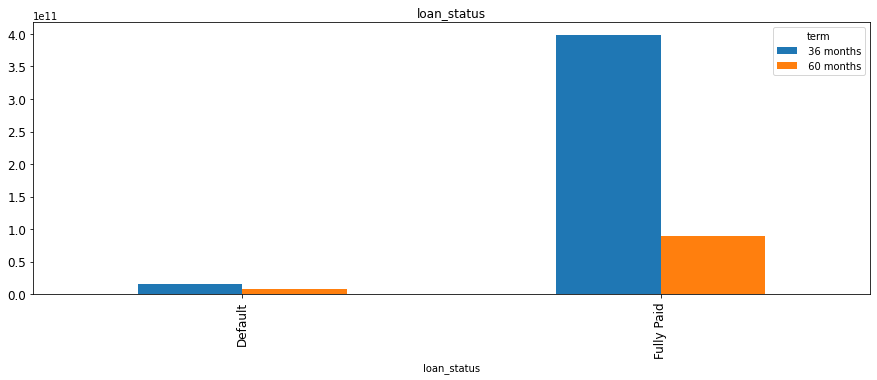

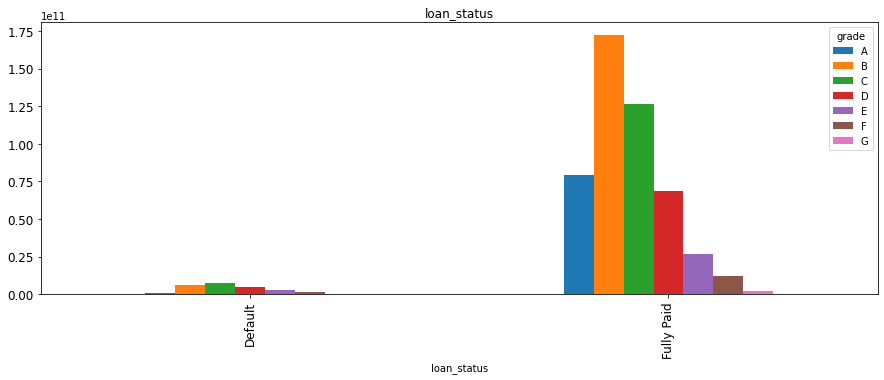

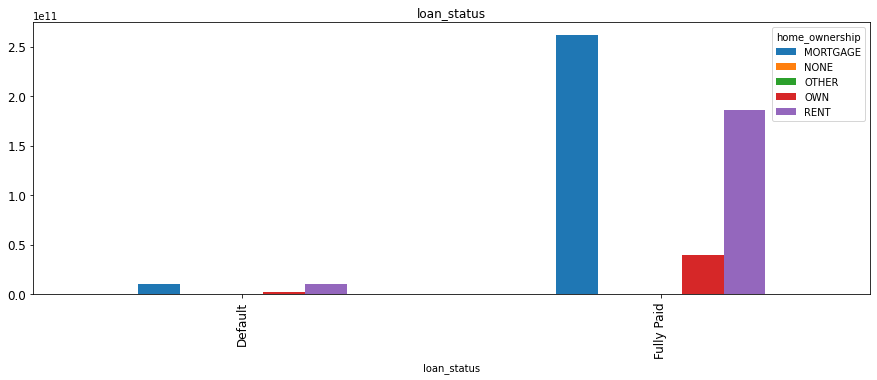

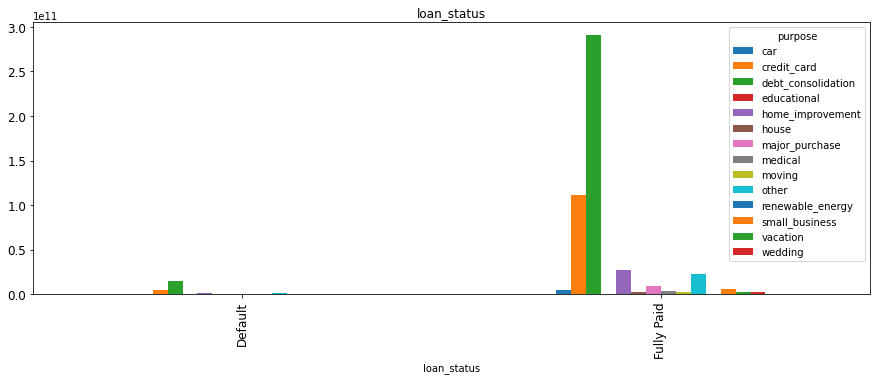

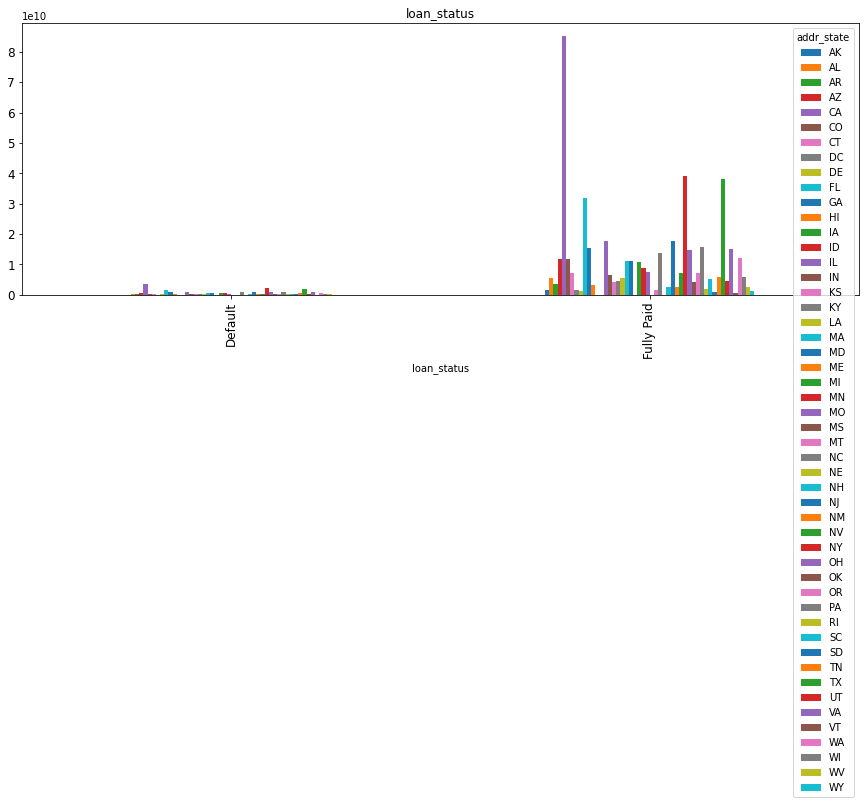

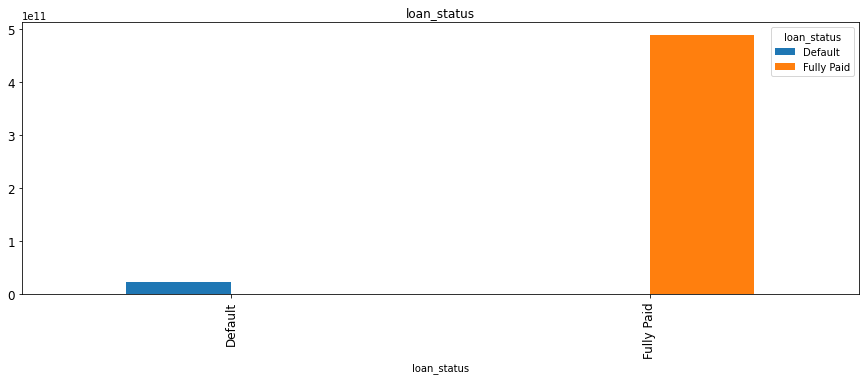

In [15]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["object"]).columns:
    pivot_sum(clean_df[col],"loan_status","member_id")
   

term            36 months     60 months
loan_status                            
Default      7.454223e+06  6.602822e+06
Fully Paid   4.119166e+06  4.651270e+06

grade                   A             B  ...             F             G
loan_status                              ...                            
Default      7.397493e+06  7.207888e+06  ...  6.636856e+06  7.390644e+06
Fully Paid   3.401170e+06  4.235161e+06  ...  4.934129e+06  4.595414e+06

[2 rows x 7 columns]

home_ownership      MORTGAGE          NONE  ...           OWN          RENT
loan_status                                 ...                            
Default         6.923132e+06           NaN  ...  7.462004e+06  7.294394e+06
Fully Paid      4.482387e+06  2.367139e+06  ...  4.341882e+06  3.860557e+06

[2 rows x 5 columns]

purpose               car   credit_card  ...      vacation       wedding
loan_status                              ...                            
Default      6.710622e+06  7.302547e+06  ...  8.644139e+06  5.610403e+06
Fully Paid   2.369227e+06  4.761977e+06  ...  3.280899e+06  2.106048e+06

[2 rows x 14 columns]

addr_state             AK            AL  ...            WV            WY
loan_status                              ...                            
Default      5.993201e+06  6.549316e+06  ...  8.095096e+06  8.534119e+06
Fully Paid   4.399404e+06  4.105479e+06  ...  4.337997e+06  4.219730e+06

[2 rows x 50 columns]

loan_status       Default    Fully Paid
loan_status                            
Default      7.132905e+06           NaN
Fully Paid            NaN  4.207982e+06

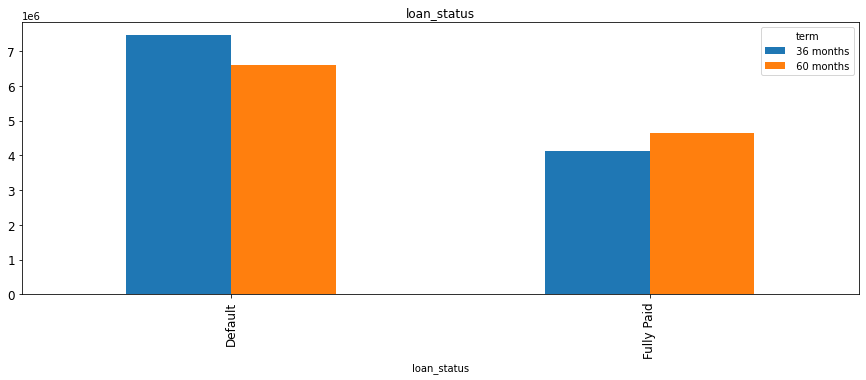

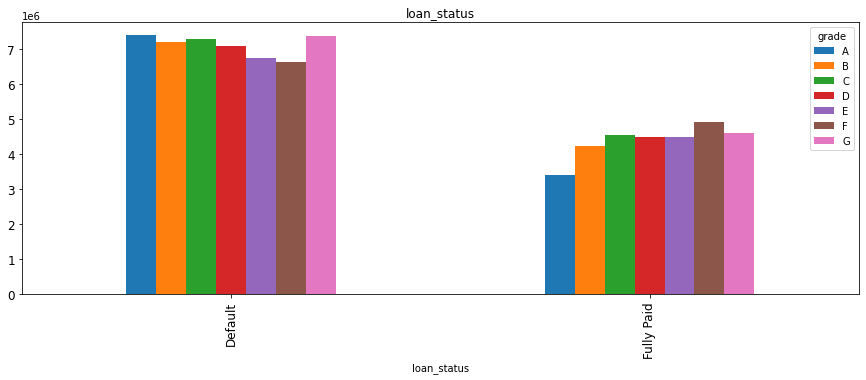

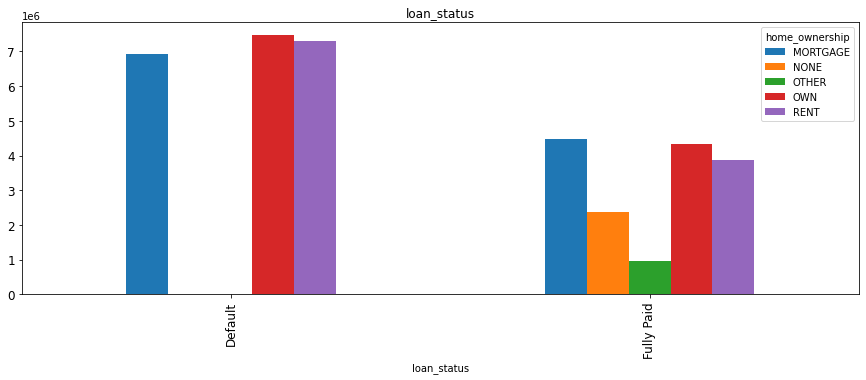

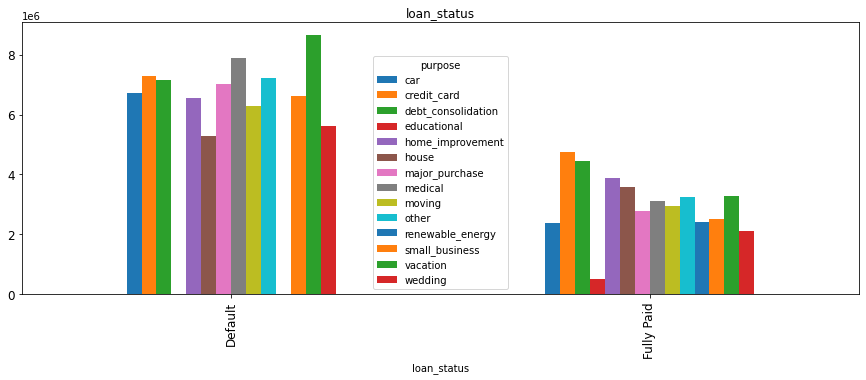

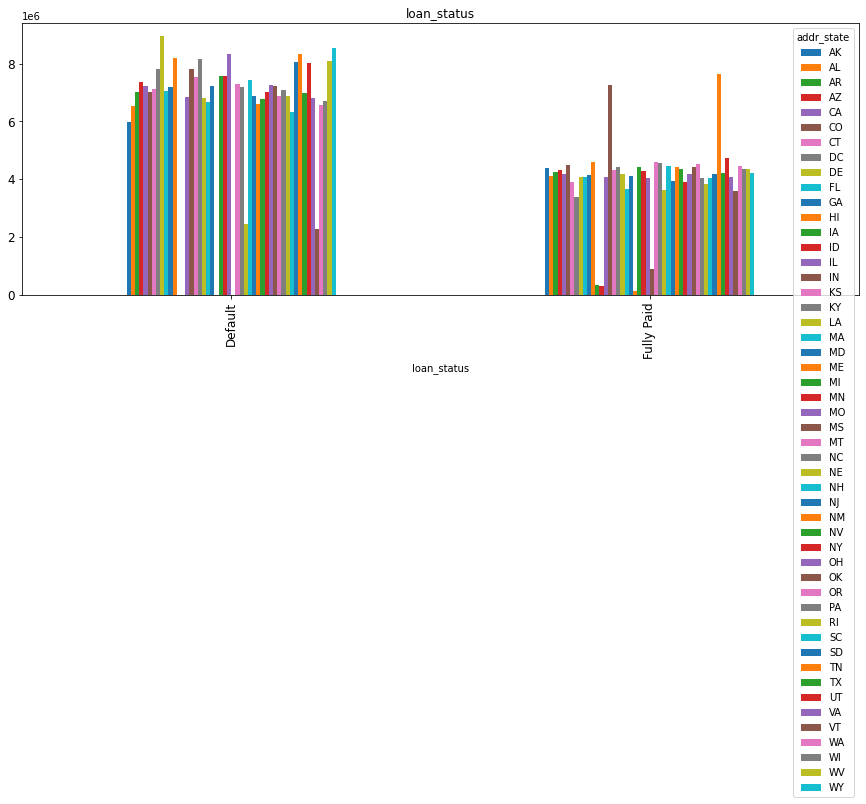

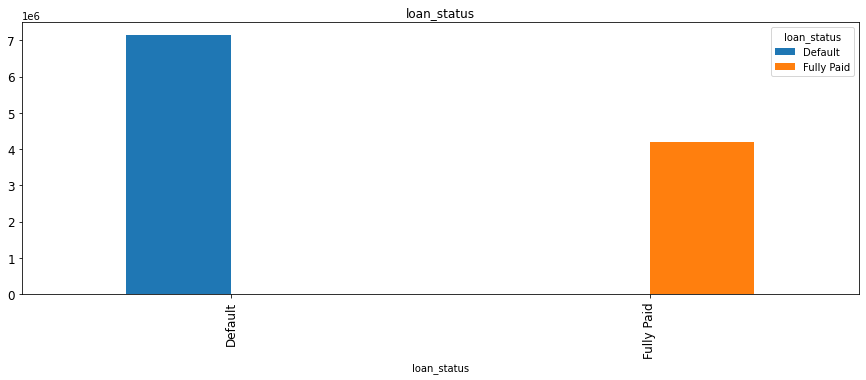

In [16]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["object"]).columns:
    pivot_mean(clean_df[col],"loan_status","member_id")

#Numeric Variables vs Dependent variable

#Bivariate Histograms Chart Methods

In [17]:
#tag =['Fully Paid', 'Default']
def target(x):
    short_0 = clean_df[clean_df.loan_status == 'Fully Paid'].loc[:,x]
    short_1 = clean_df[clean_df.loan_status == 'Default'].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Fully Paid', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='best')
    plt.title(x, fontsize=12, loc="center")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [18]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   member_id        119145 non-null  int64  
 1   loan_amnt        119145 non-null  int64  
 2   funded_amnt      119145 non-null  int64  
 3   funded_amnt_inv  119145 non-null  float64
 4   term             119145 non-null  object 
 5   int_rate         119145 non-null  float64
 6   installment      119145 non-null  float64
 7   grade            119145 non-null  object 
 8   emp_length       119145 non-null  int64  
 9   home_ownership   119145 non-null  object 
 10  annual_inc       119145 non-null  float64
 11  purpose          119145 non-null  object 
 12  addr_state       119145 non-null  object 
 13  dti              119145 non-null  float64
 14  open_acc         119145 non-null  int64  
 15  revol_bal        119145 non-null  int64  
 16  revol_util       119145 non-null  floa

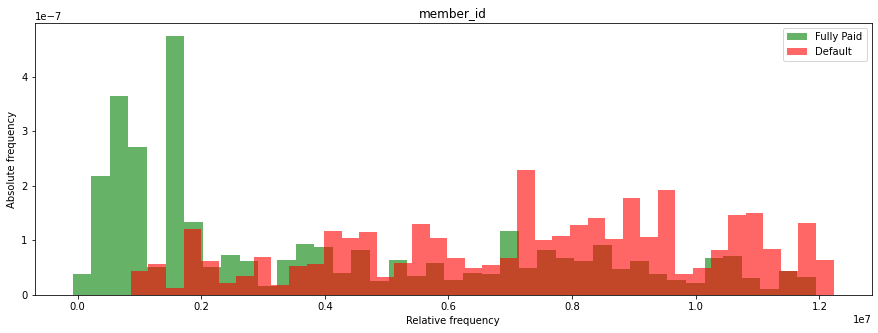

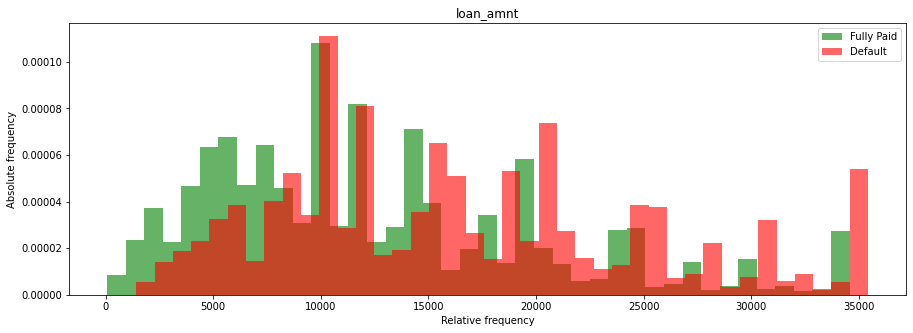

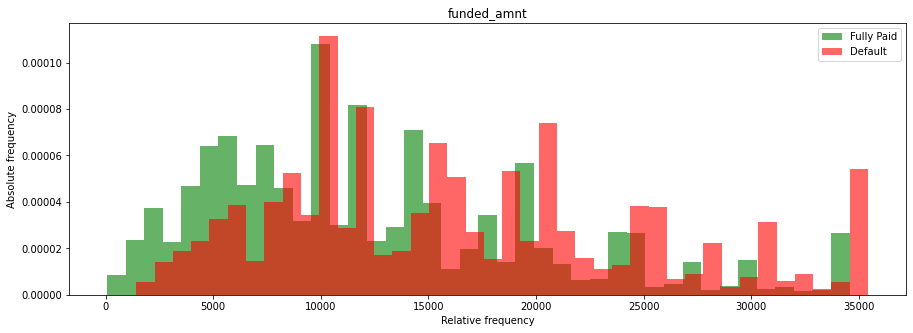

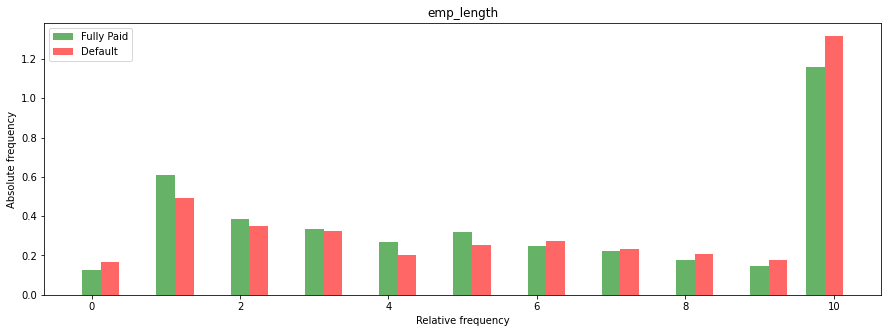

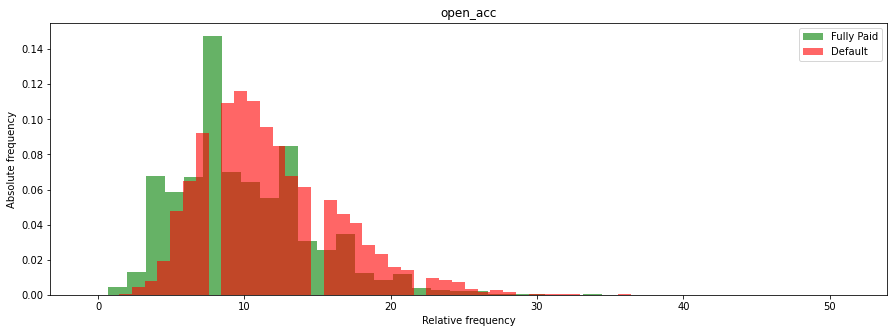

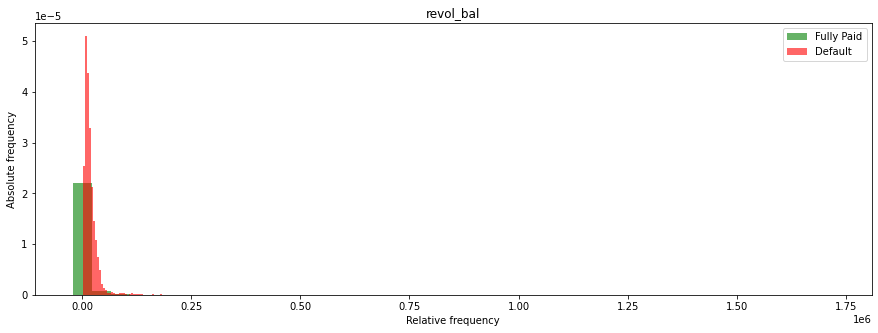

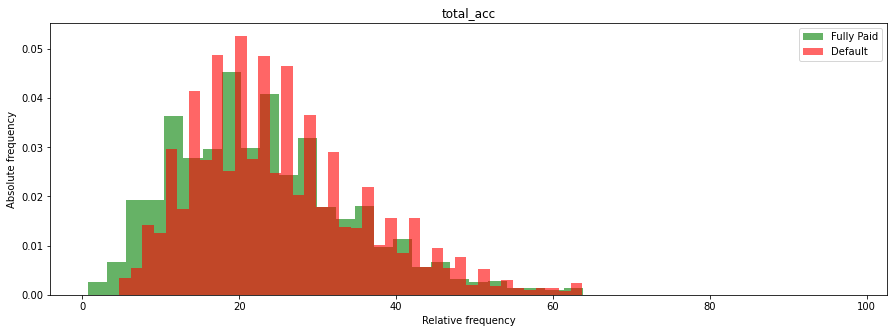

In [19]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["int64"]).columns:
      target(col)
    

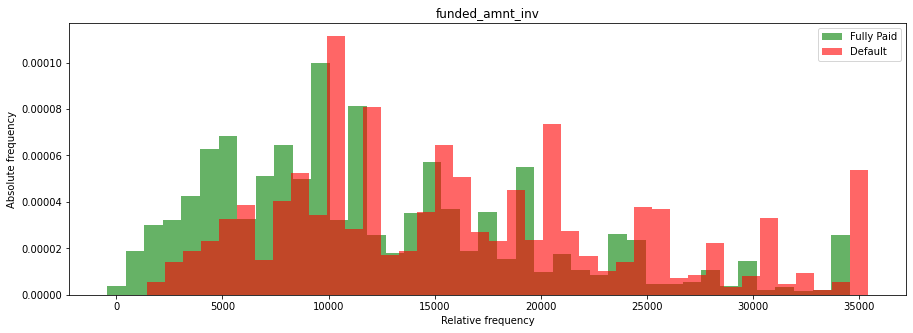

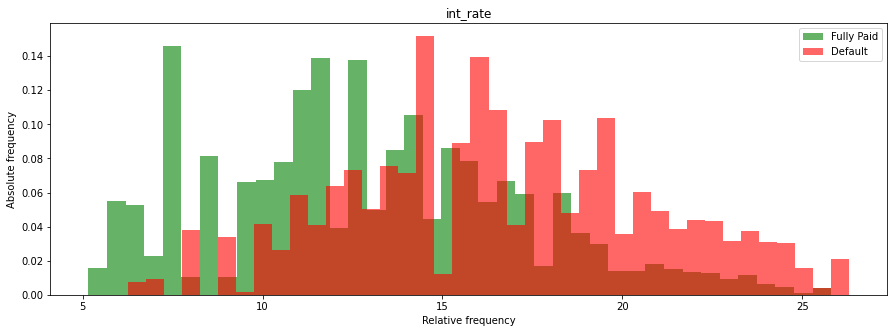

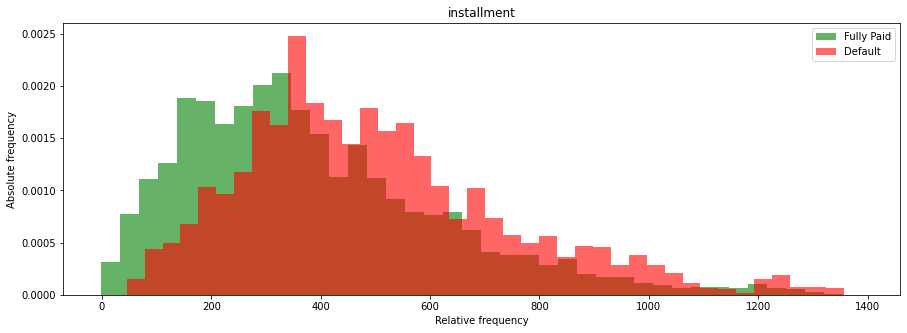

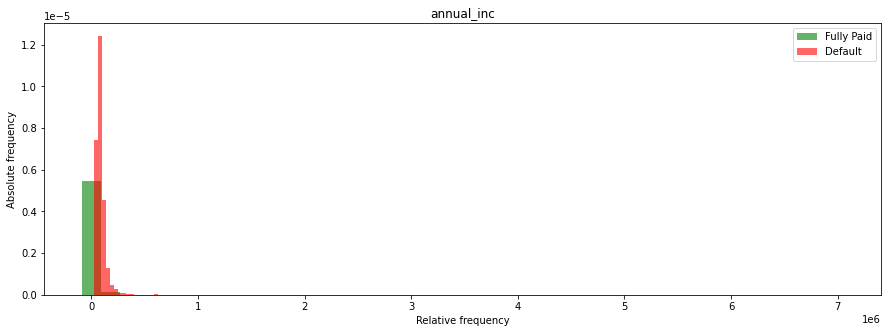

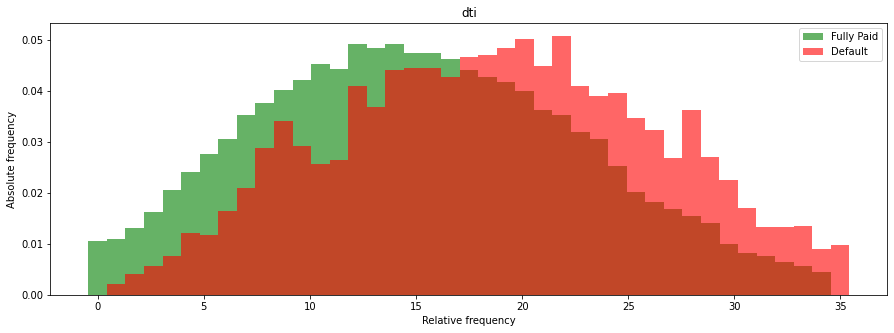

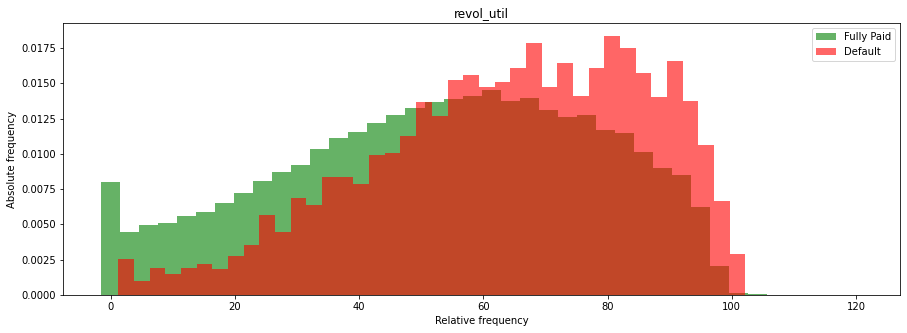

In [20]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["float64"]).columns:
      target(col)

#Correlations Analysis

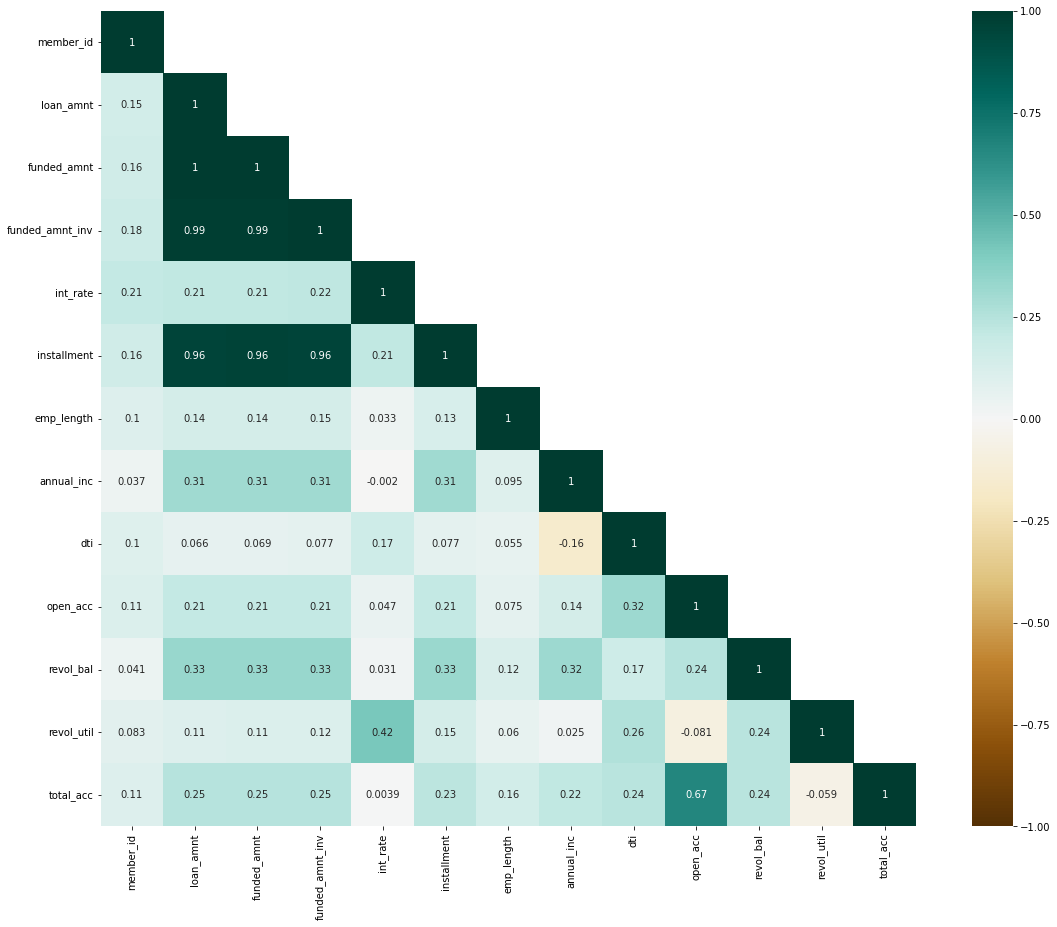

In [21]:
mask = np.triu(clean_df.corr(), 1)
plt.figure(figsize=(20, 15))
sns.heatmap(clean_df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

#One-Hot Encoding Feature Engineering

In [22]:
Exp_Df = clean_df.copy()
Exp_Df.loc[(Exp_Df.loan_status == 'Fully Paid'),'loan_status']=0
Exp_Df.loc[(Exp_Df.loan_status == 'Default'),'loan_status']=1
Exp_Df['loan_status']= pd.to_numeric(Exp_Df['loan_status'])
Exp_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   member_id        119145 non-null  int64  
 1   loan_amnt        119145 non-null  int64  
 2   funded_amnt      119145 non-null  int64  
 3   funded_amnt_inv  119145 non-null  float64
 4   term             119145 non-null  object 
 5   int_rate         119145 non-null  float64
 6   installment      119145 non-null  float64
 7   grade            119145 non-null  object 
 8   emp_length       119145 non-null  int64  
 9   home_ownership   119145 non-null  object 
 10  annual_inc       119145 non-null  float64
 11  purpose          119145 non-null  object 
 12  addr_state       119145 non-null  object 
 13  dti              119145 non-null  float64
 14  open_acc         119145 non-null  int64  
 15  revol_bal        119145 non-null  int64  
 16  revol_util       119145 non-null  floa

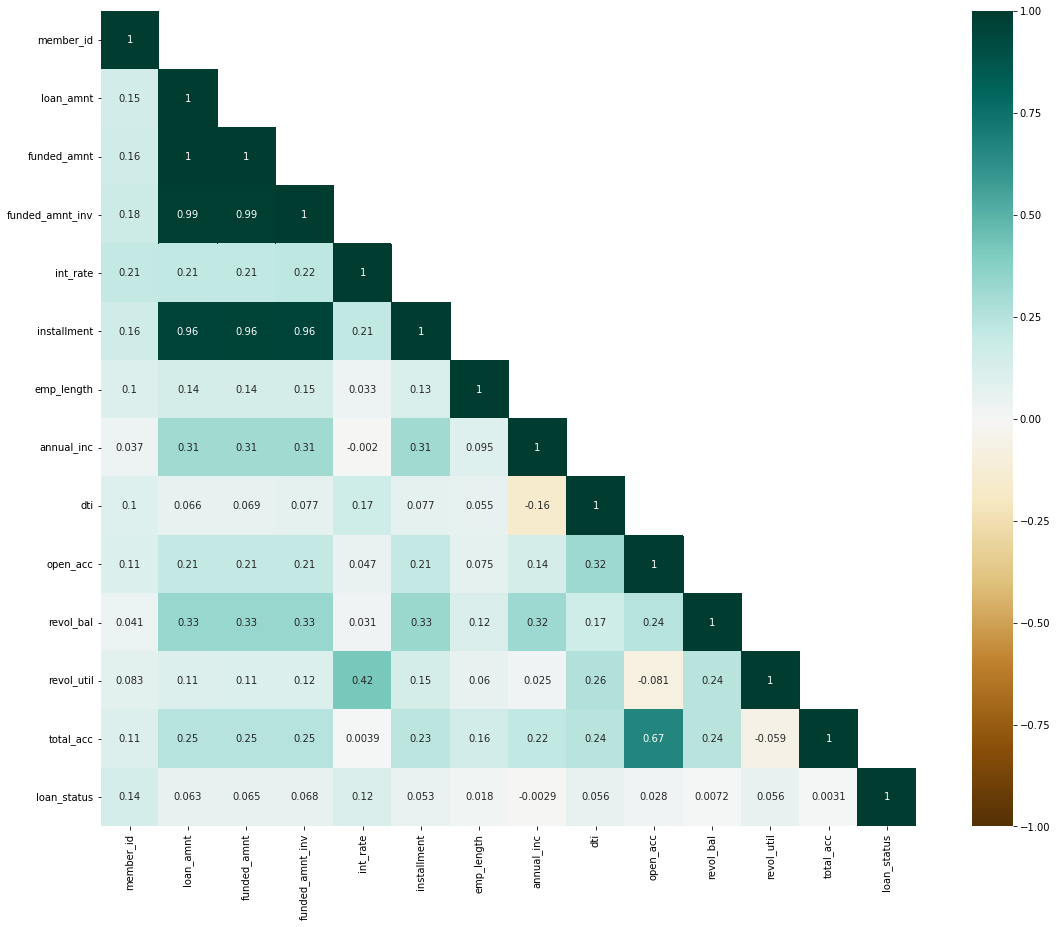

In [23]:
mask = np.triu(Exp_Df.corr(), 1)
plt.figure(figsize=(20, 15))
sns.heatmap(Exp_Df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [24]:
bad_loan_c = pg.pairwise_corr(Exp_Df, columns=['loan_status'], method='pearson').loc[:,['X','Y','r']]
bad_loan_c.sort_values(by=['r'], ascending=False)

X                Y         r
0   loan_status        member_id  0.138100
4   loan_status         int_rate  0.120106
3   loan_status  funded_amnt_inv  0.067570
2   loan_status      funded_amnt  0.064925
1   loan_status        loan_amnt  0.063310
8   loan_status              dti  0.055947
11  loan_status       revol_util  0.055557
5   loan_status      installment  0.053462
9   loan_status         open_acc  0.028309
6   loan_status       emp_length  0.017754
10  loan_status        revol_bal  0.007182
12  loan_status        total_acc  0.003066
7   loan_status       annual_inc -0.002907

In [25]:
data_spear = Exp_Df.copy()
data_spear.drop(["loan_status"], axis=1, inplace=True)

spearman_rank = pg.pairwise_corr(data_spear, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

X                Y         r
0    loan_amnt      funded_amnt  0.996830
1  funded_amnt  funded_amnt_inv  0.988144
2    loan_amnt  funded_amnt_inv  0.984153
3  funded_amnt      installment  0.976640
4    loan_amnt      installment  0.971094
5     int_rate        total_acc -0.010704
6     int_rate       annual_inc -0.018873
7   revol_util        total_acc -0.060883
8     open_acc       revol_util -0.091741
9   annual_inc              dti -0.174915

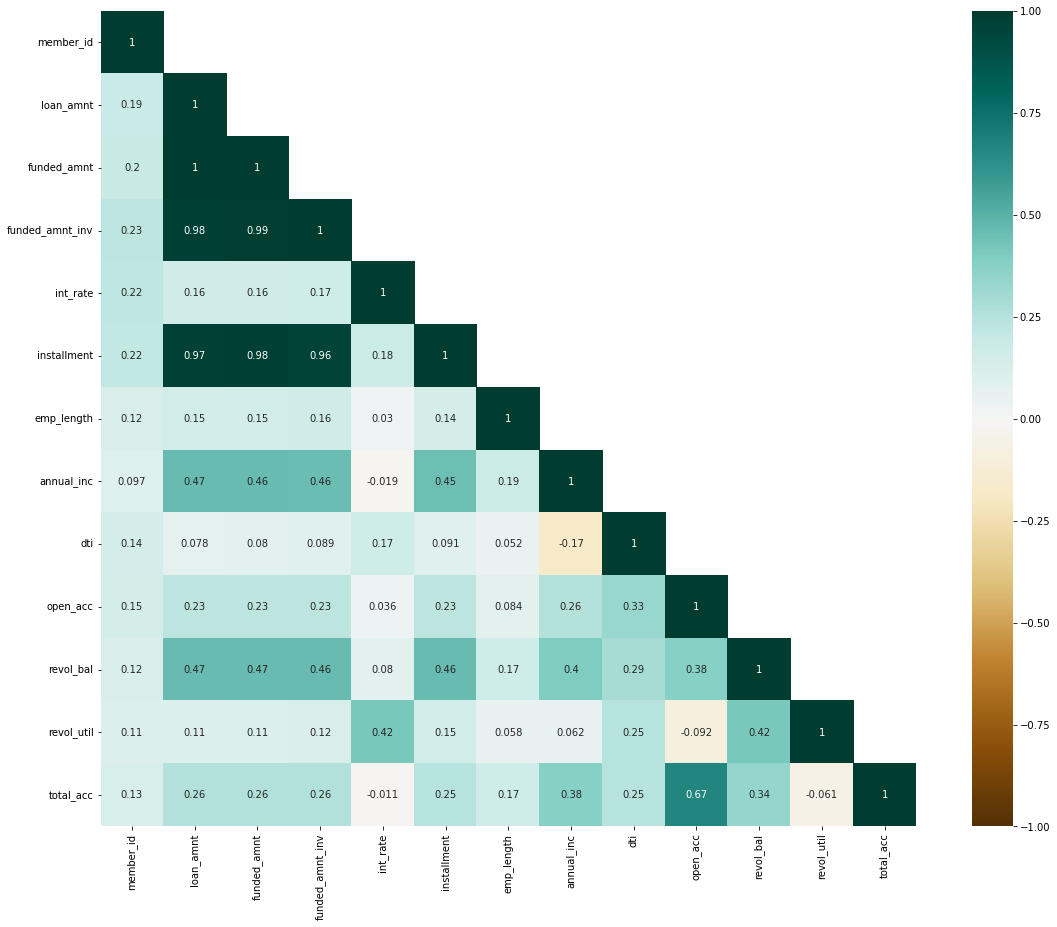

In [26]:
mask = np.triu(data_spear.corr(method='spearman'), 1)
plt.figure(figsize=(20, 15))
sns.heatmap(data_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

#Feature Engineering

In [27]:
EDA_Df= Exp_Df.copy()

In [28]:
Exp_Df.describe()

member_id      loan_amnt  ...      total_acc    loan_status
count  1.191450e+05  119145.000000  ...  119145.000000  119145.000000
mean   4.288577e+06   12983.233245  ...      24.304436       0.027555
std    3.466994e+06    7814.069451  ...      11.364550       0.163694
min    7.069900e+04     500.000000  ...       2.000000       0.000000
25%    1.240242e+06    7000.000000  ...      16.000000       0.000000
50%    2.839634e+06   11300.000000  ...      23.000000       0.000000
75%    7.277043e+06   18000.000000  ...      31.000000       0.000000
max    1.209697e+07   35000.000000  ...      99.000000       1.000000

[8 rows x 14 columns]

#Numerical Binning Feature Engineering

In [29]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
EDA_Df['loan_amnt_range'] = pd.cut(EDA_Df['loan_amnt'], bins, labels=bucket_l)

# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
EDA_Df['int_rate_range'] = pd.cut(EDA_Df['int_rate'], bins, labels=bucket_l)
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
EDA_Df['annual_inc_range'] = pd.cut(EDA_Df['annual_inc'], bins, labels=bucket_l)
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

EDA_Df['installment'] = EDA_Df['installment'].apply(lambda x: installment(x))
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
EDA_Df['dti_range'] = pd.cut(EDA_Df['dti'], bins, labels=bucket_l)


In [30]:
EDA_Df.head()

member_id  loan_amnt  funded_amnt  ...  int_rate_range annual_inc_range  dti_range
0    1296599       5000         5000  ...         10-12.5          0-25000       25%+
1    1313524       2400         2400  ...             15+          0-25000      5-10%
2    1277178      10000        10000  ...         12.5-15      25000-50000     15-20%
3    1311441       5000         5000  ...          7.5-10      25000-50000     10-15%
4    1288686       3000         3000  ...             15+      25000-50000      5-10%

[5 rows x 23 columns]

In [31]:
EDA_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   member_id         119145 non-null  int64   
 1   loan_amnt         119145 non-null  int64   
 2   funded_amnt       119145 non-null  int64   
 3   funded_amnt_inv   119145 non-null  float64 
 4   term              119145 non-null  object  
 5   int_rate          119145 non-null  float64 
 6   installment       119145 non-null  object  
 7   grade             119145 non-null  object  
 8   emp_length        119145 non-null  int64   
 9   home_ownership    119145 non-null  object  
 10  annual_inc        119145 non-null  float64 
 11  purpose           119145 non-null  object  
 12  addr_state        119145 non-null  object  
 13  dti               119145 non-null  float64 
 14  open_acc          119145 non-null  int64   
 15  revol_bal         119145 non-null  int64   
 16  re

In [32]:
EDA_Df.shape

(119145, 23)

In [33]:
for col in ['term', 'installment', 'grade', 'loan_amnt_range', 'home_ownership','purpose','addr_state', 'int_rate_range', 'annual_inc_range', 'dti_range']:
    EDA_Df[col] = EDA_Df[col].astype('category')
#EDA_Df = EDA_Df[ 'loan_amnt_range',  'int_rate_range', 'annual_inc_range', 'dti_range'].astype('object')

#Target Variable

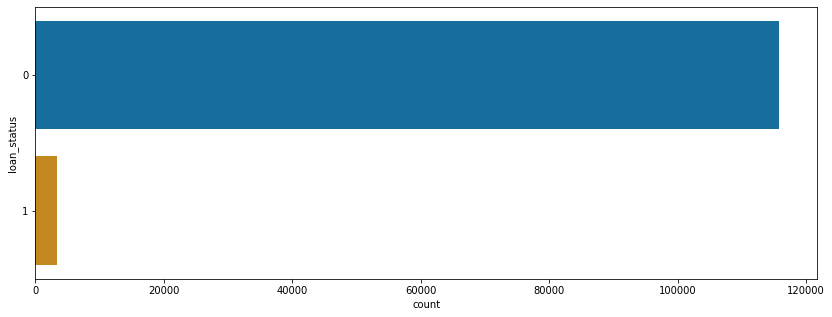

In [34]:
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=EDA_Df ,palette=("colorblind"))
sns.set_context("poster")
plt.show()


#Bar Plot Methods Univariate Analysis


In [99]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=EDA_Df, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='Orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5), xrotate=False):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=EDA_Df, palette=("colorblind"))
    sns.set_context("poster")
    plt.title("Loan Defaults wrt "+str(x)+" feature")
    plt.xlabel(x, fontsize=16)
    if(xrotate==True):
      plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

#Categorical Features

In [36]:
EDA_Df.describe()

member_id      loan_amnt  ...      total_acc    loan_status
count  1.191450e+05  119145.000000  ...  119145.000000  119145.000000
mean   4.288577e+06   12983.233245  ...      24.304436       0.027555
std    3.466994e+06    7814.069451  ...      11.364550       0.163694
min    7.069900e+04     500.000000  ...       2.000000       0.000000
25%    1.240242e+06    7000.000000  ...      16.000000       0.000000
50%    2.839634e+06   11300.000000  ...      23.000000       0.000000
75%    7.277043e+06   18000.000000  ...      31.000000       0.000000
max    1.209697e+07   35000.000000  ...      99.000000       1.000000

[8 rows x 13 columns]

In [37]:
EDA_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   member_id         119145 non-null  int64   
 1   loan_amnt         119145 non-null  int64   
 2   funded_amnt       119145 non-null  int64   
 3   funded_amnt_inv   119145 non-null  float64 
 4   term              119145 non-null  category
 5   int_rate          119145 non-null  float64 
 6   installment       119145 non-null  category
 7   grade             119145 non-null  category
 8   emp_length        119145 non-null  int64   
 9   home_ownership    119145 non-null  category
 10  annual_inc        119145 non-null  float64 
 11  purpose           119145 non-null  category
 12  addr_state        119145 non-null  category
 13  dti               119145 non-null  float64 
 14  open_acc          119145 non-null  int64   
 15  revol_bal         119145 non-null  int64   
 16  re

#Visualize Categories

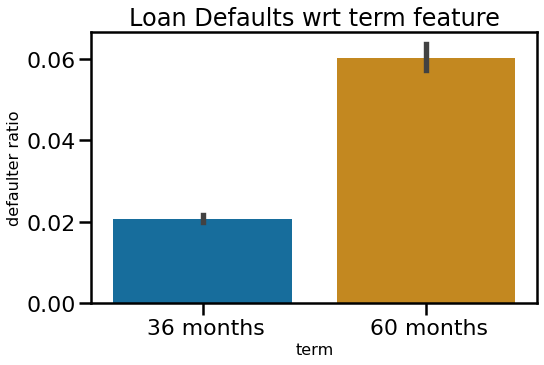

In [38]:
plotUnivariateBar('term',figsize=(8,5))


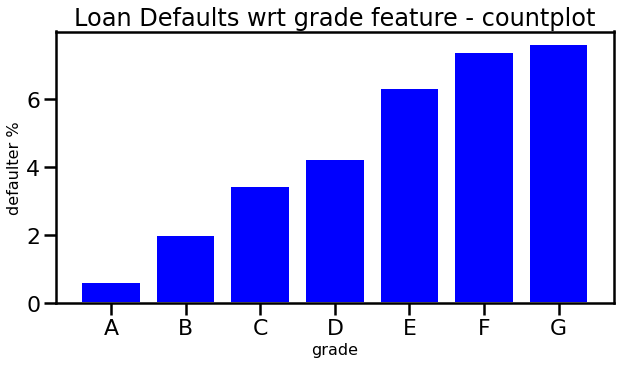

In [39]:
plotUnivariateRatioBar("grade")

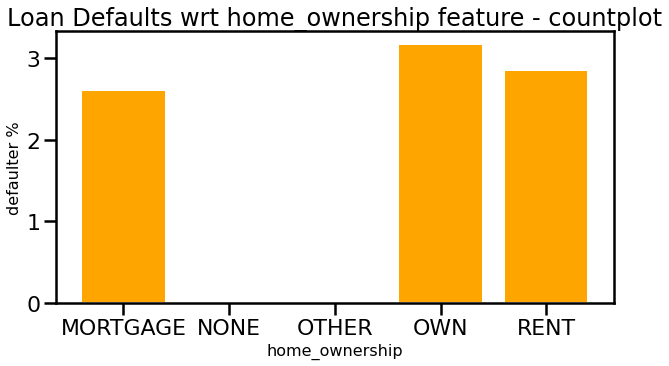

In [100]:
plotUnivariateRatioBar("home_ownership")

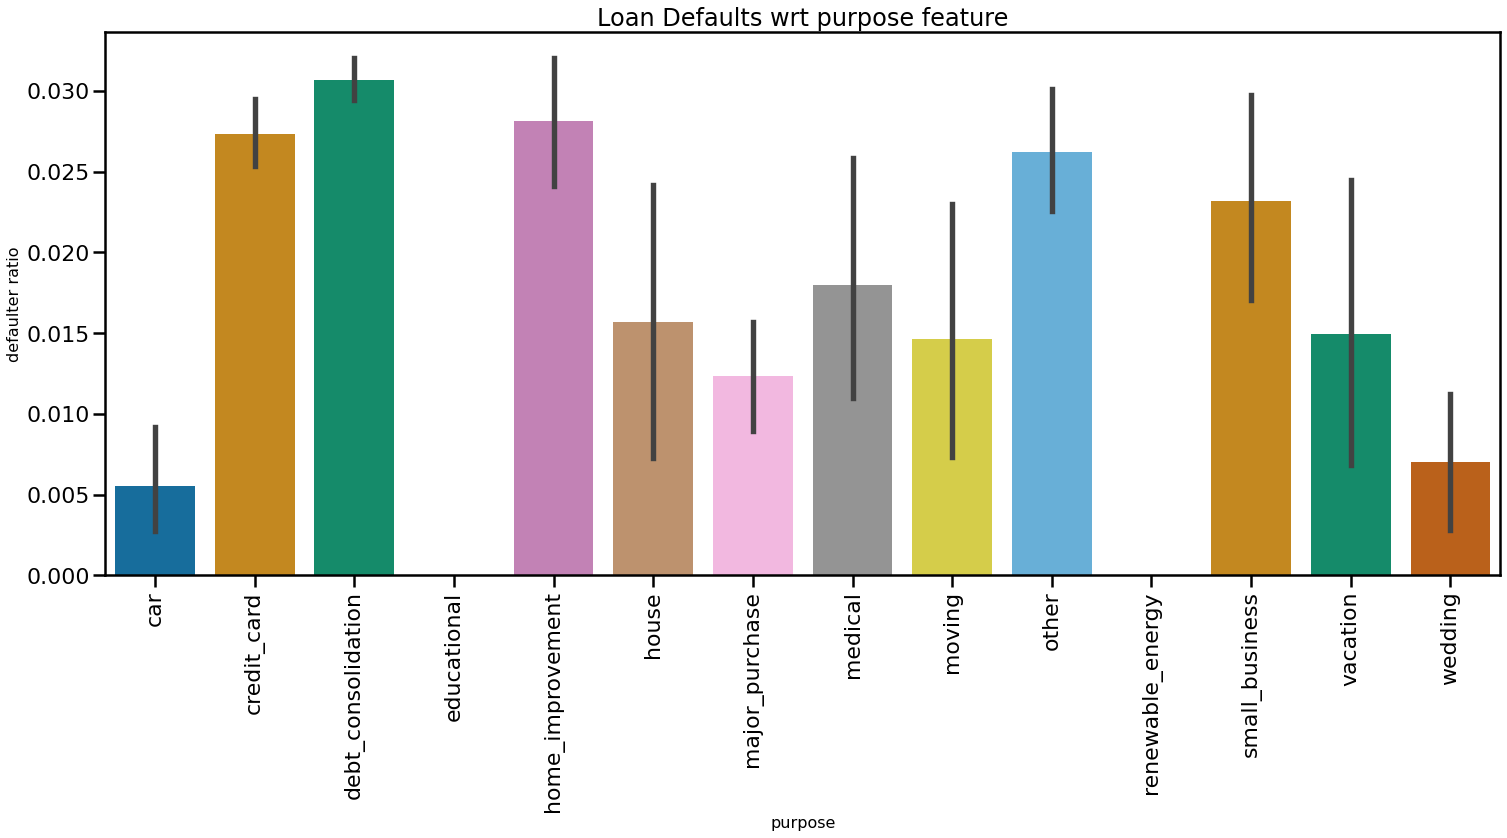

In [41]:
plotUnivariateBar("purpose", figsize=(25,10),xrotate=True)

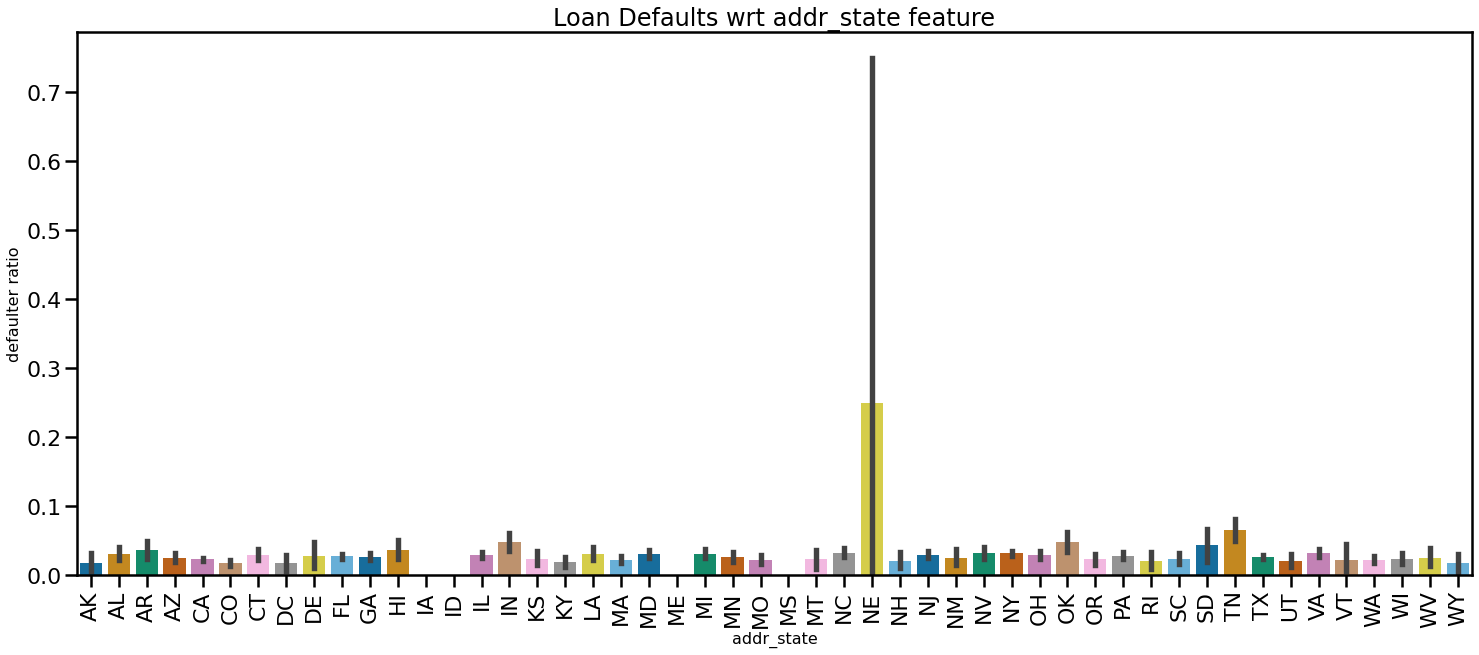

In [42]:
plotUnivariateBar("addr_state", figsize=(25,10),xrotate=True)

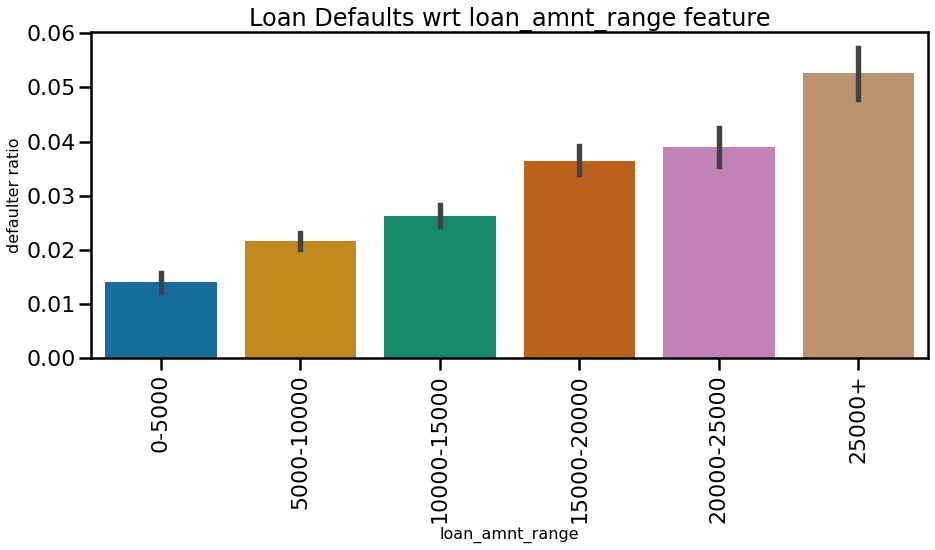

In [43]:
plotUnivariateBar("loan_amnt_range", figsize=(15,6),xrotate=True)

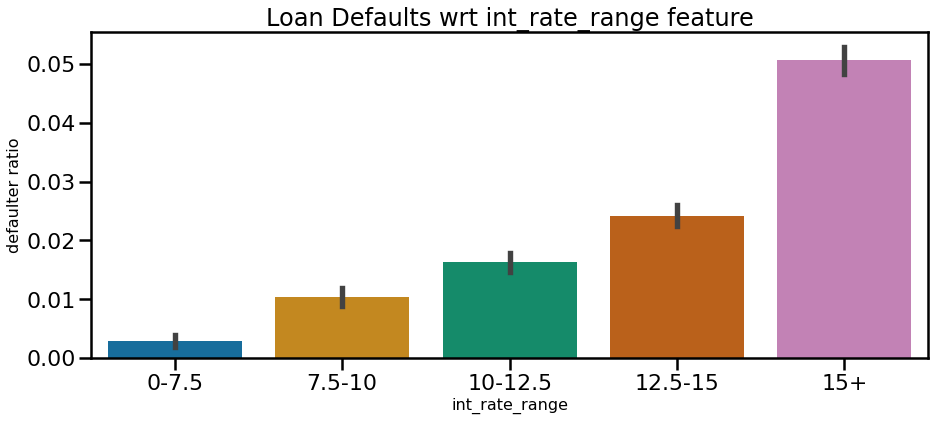

In [44]:
plotUnivariateBar("int_rate_range", figsize=(15,6))

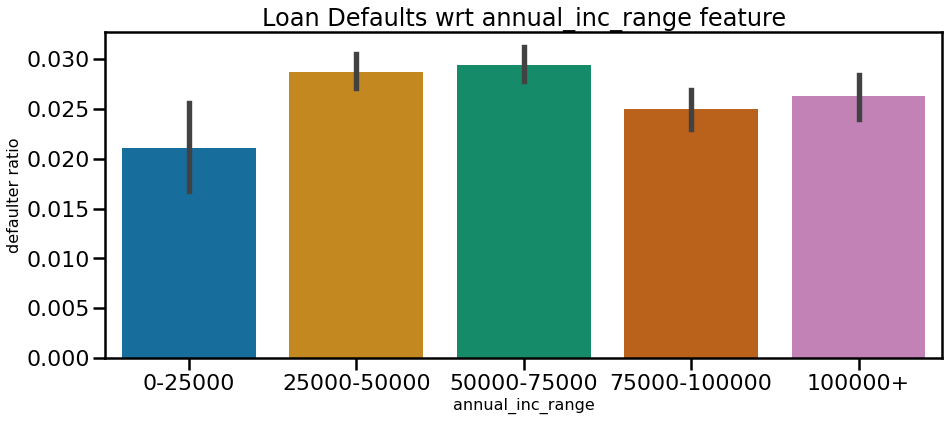

In [45]:
plotUnivariateBar("annual_inc_range", figsize=(15,6))

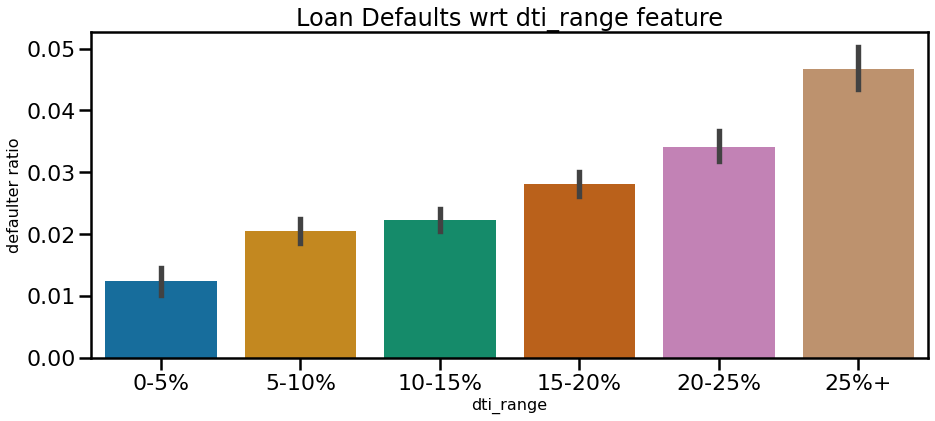

In [46]:
plotUnivariateBar("dti_range", figsize=(15,6))

In [47]:
EDA_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   member_id         119145 non-null  int64   
 1   loan_amnt         119145 non-null  int64   
 2   funded_amnt       119145 non-null  int64   
 3   funded_amnt_inv   119145 non-null  float64 
 4   term              119145 non-null  category
 5   int_rate          119145 non-null  float64 
 6   installment       119145 non-null  category
 7   grade             119145 non-null  category
 8   emp_length        119145 non-null  int64   
 9   home_ownership    119145 non-null  category
 10  annual_inc        119145 non-null  float64 
 11  purpose           119145 non-null  category
 12  addr_state        119145 non-null  category
 13  dti               119145 non-null  float64 
 14  open_acc          119145 non-null  int64   
 15  revol_bal         119145 non-null  int64   
 16  re

#Continuous Features

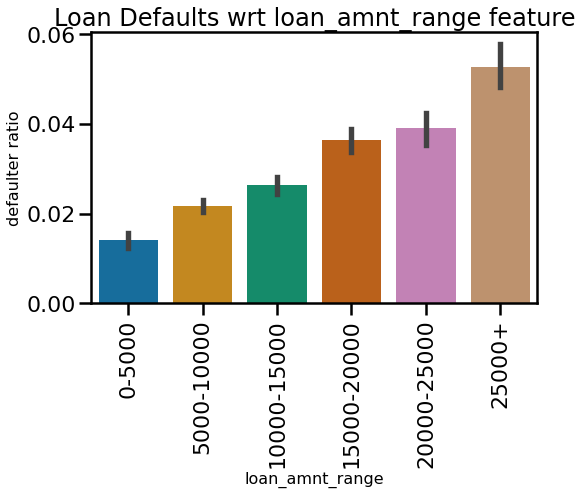

In [48]:
plotUnivariateBar("loan_amnt_range", figsize=(8,5),xrotate=True)

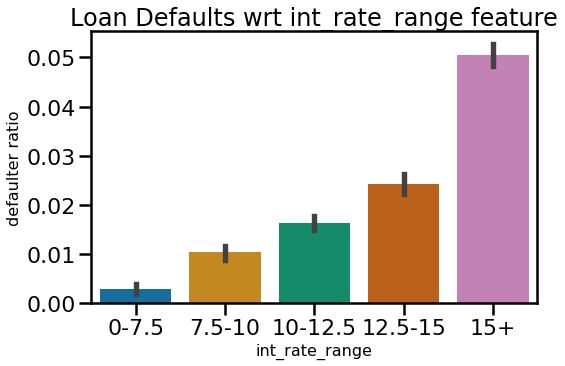

In [49]:
plotUnivariateBar("int_rate_range", figsize=(8,5))

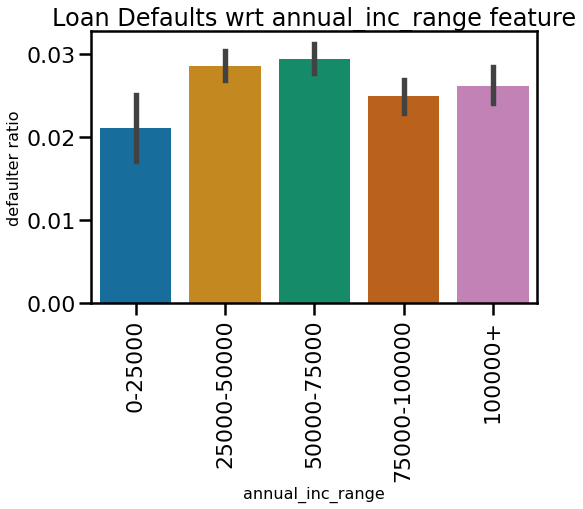

In [50]:
plotUnivariateBar("annual_inc_range", figsize=(8,5),xrotate=True)

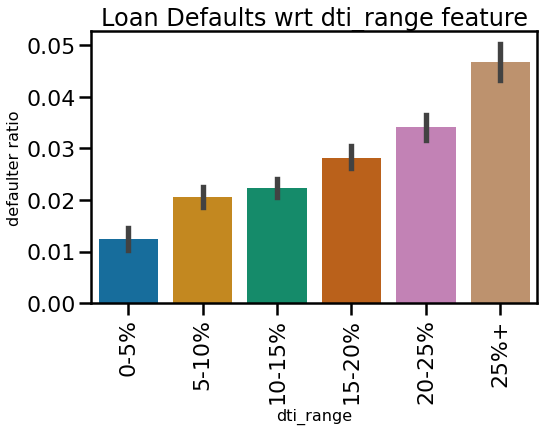

In [51]:
plotUnivariateBar("dti_range", figsize=(8,5),xrotate=True)

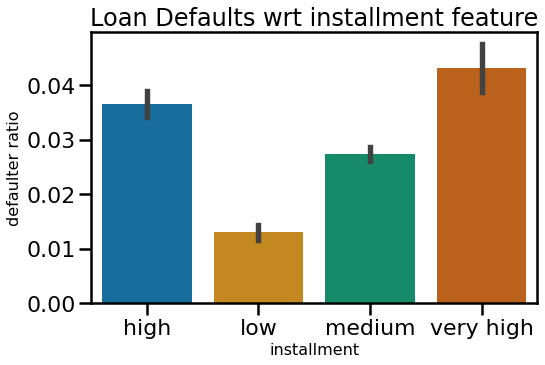

In [52]:
plotUnivariateBar("installment", figsize=(8,5))

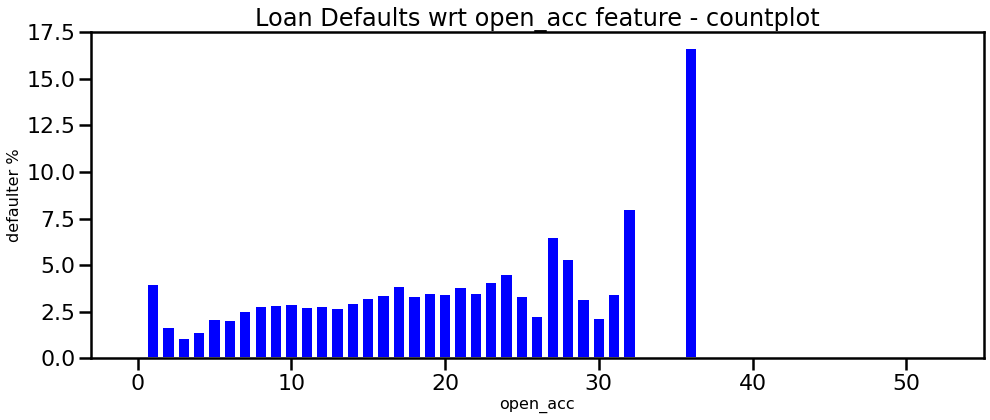

In [53]:
plotUnivariateRatioBar("open_acc",figsize=(16,6))

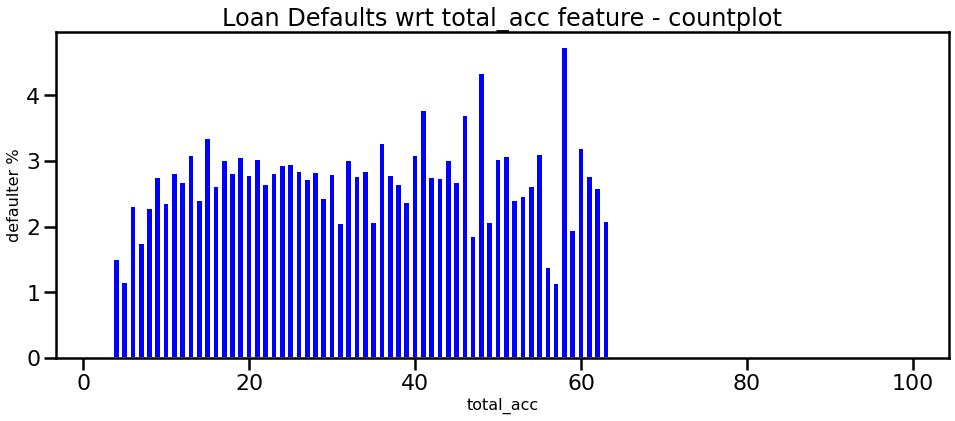

In [54]:
plotUnivariateRatioBar("total_acc",figsize=(16,6))

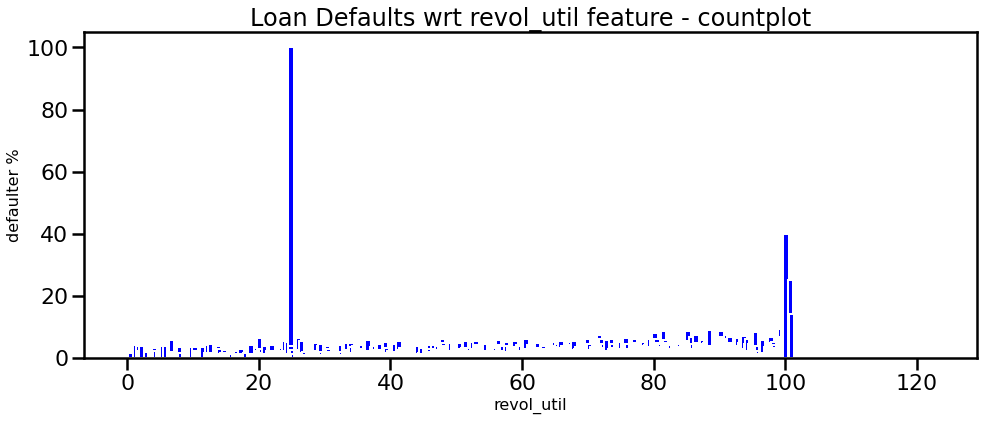

In [55]:
plotUnivariateRatioBar("revol_util",figsize=(16,6))

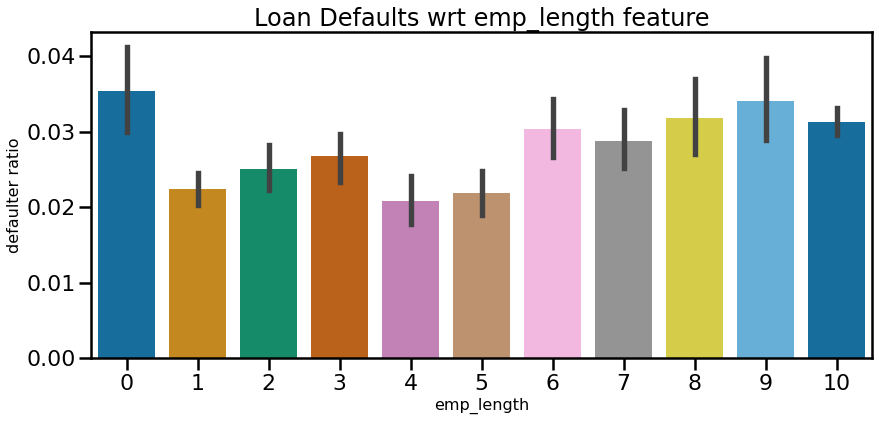

In [56]:
plotUnivariateBar("emp_length", figsize=(14,6))

#Bivariate Analysis

#Scatter Plot and Bivariate Bar Graph Methods

In [57]:
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=EDA_Df)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6),xrotate=False):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=EDA_Df)
    plt.title("Loan Default ratio wrt "+x+" feature for "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    if(xrotate==True):
      plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

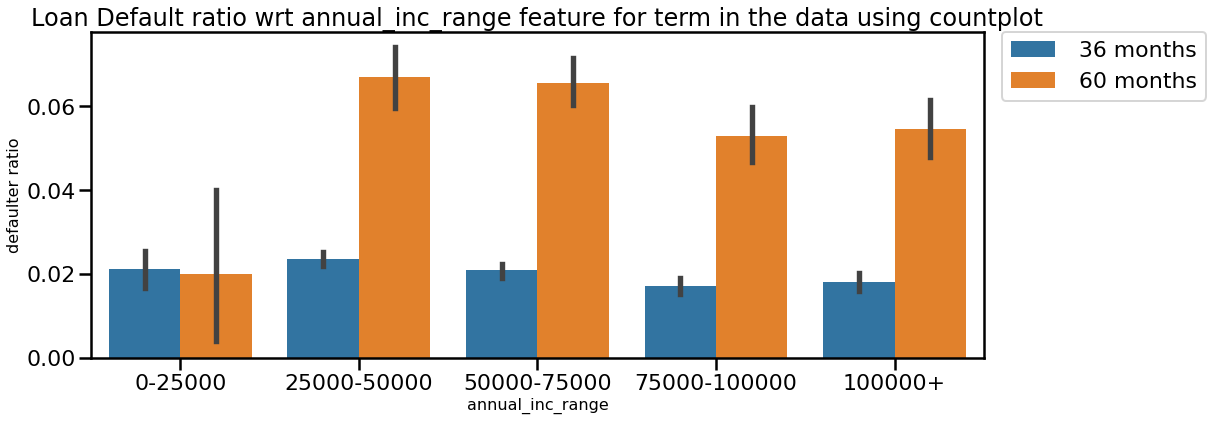

In [58]:
plotBivariateBar("annual_inc_range", "term")

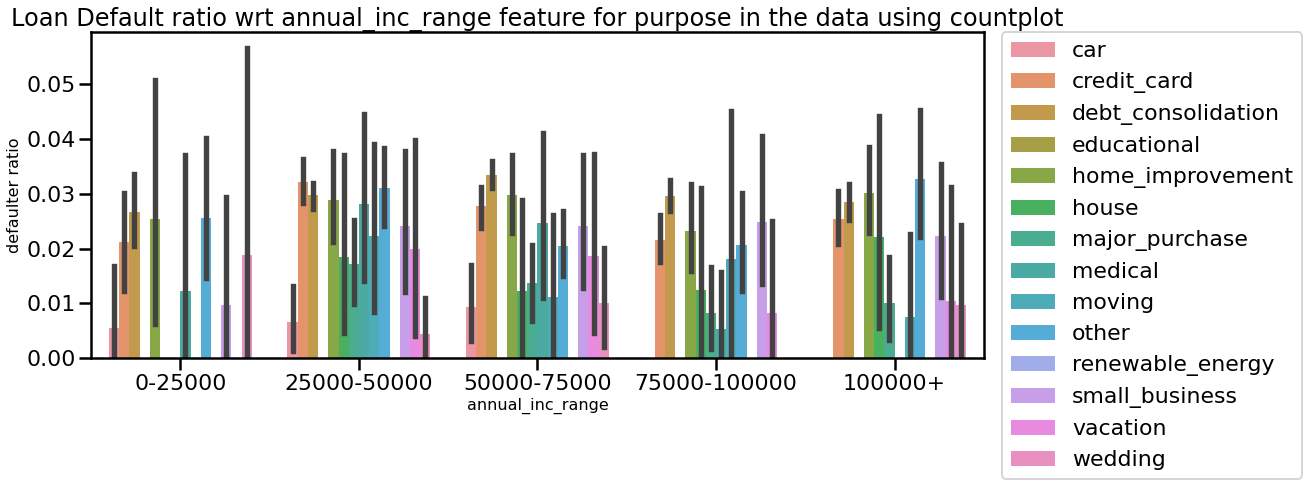

In [59]:
plotBivariateBar("annual_inc_range", "purpose")


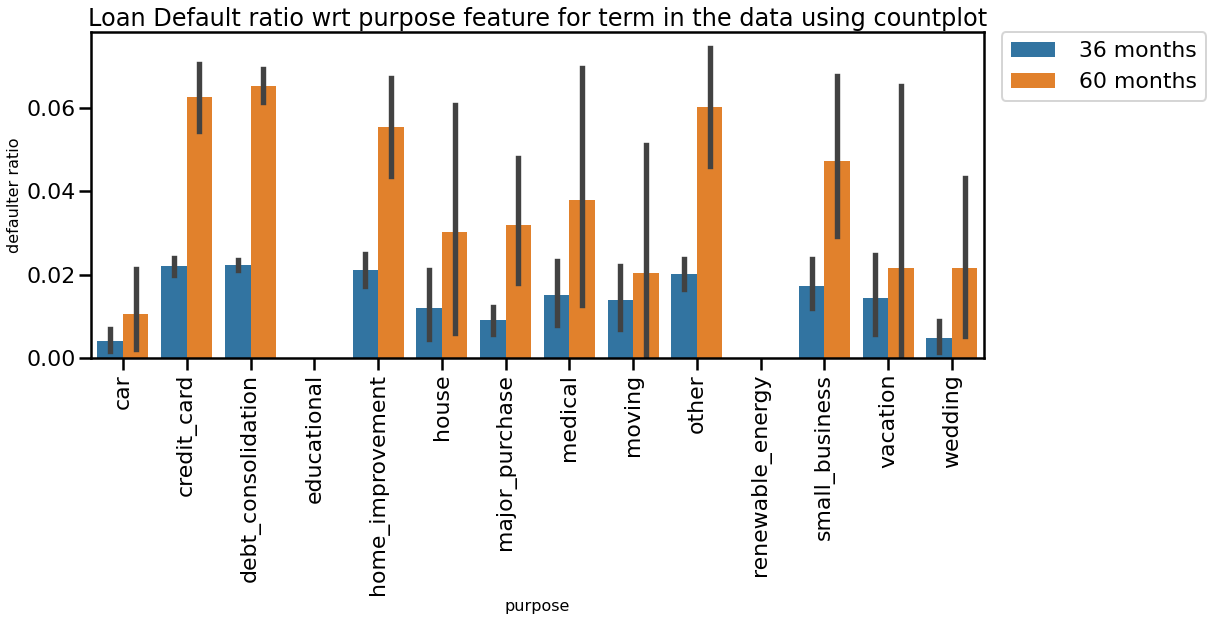

In [60]:
plotBivariateBar("purpose", "term",xrotate=True)

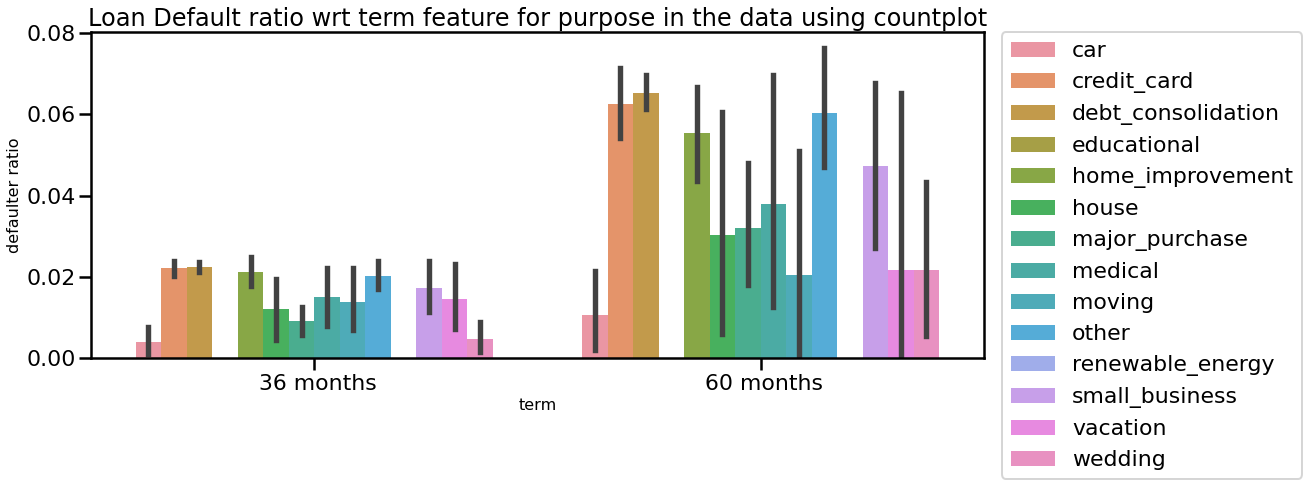

In [61]:
plotBivariateBar("term", "purpose")

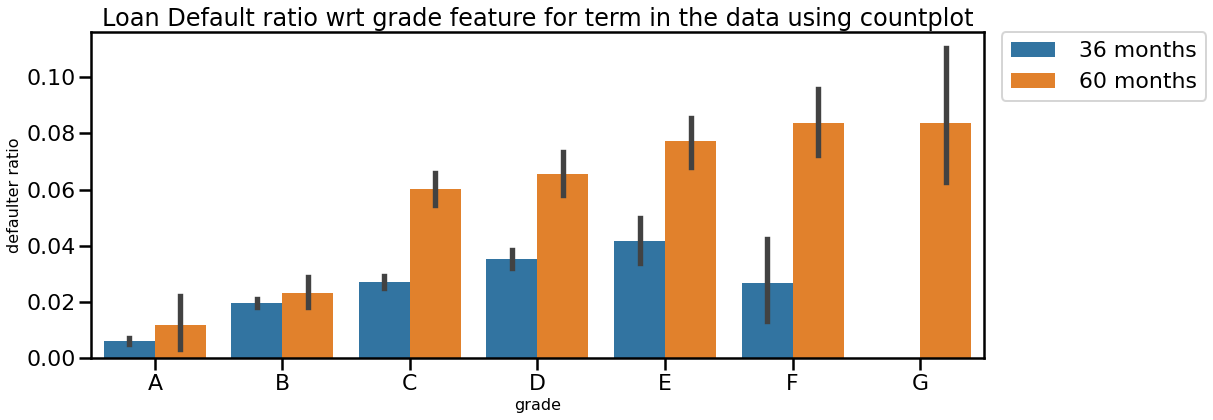

In [62]:
plotBivariateBar("grade", "term")

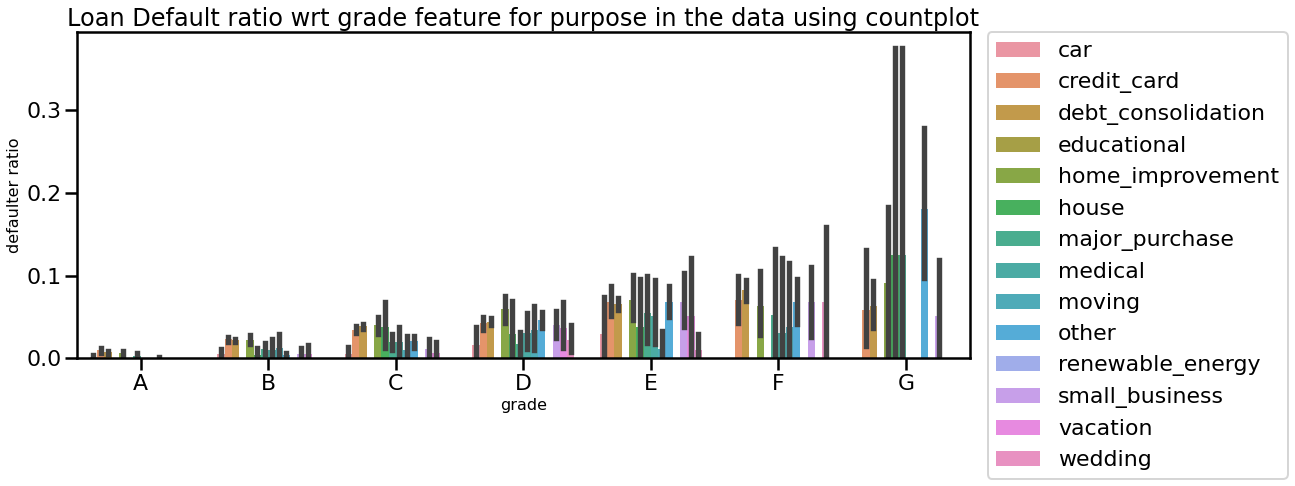

In [63]:
plotBivariateBar("grade", "purpose")

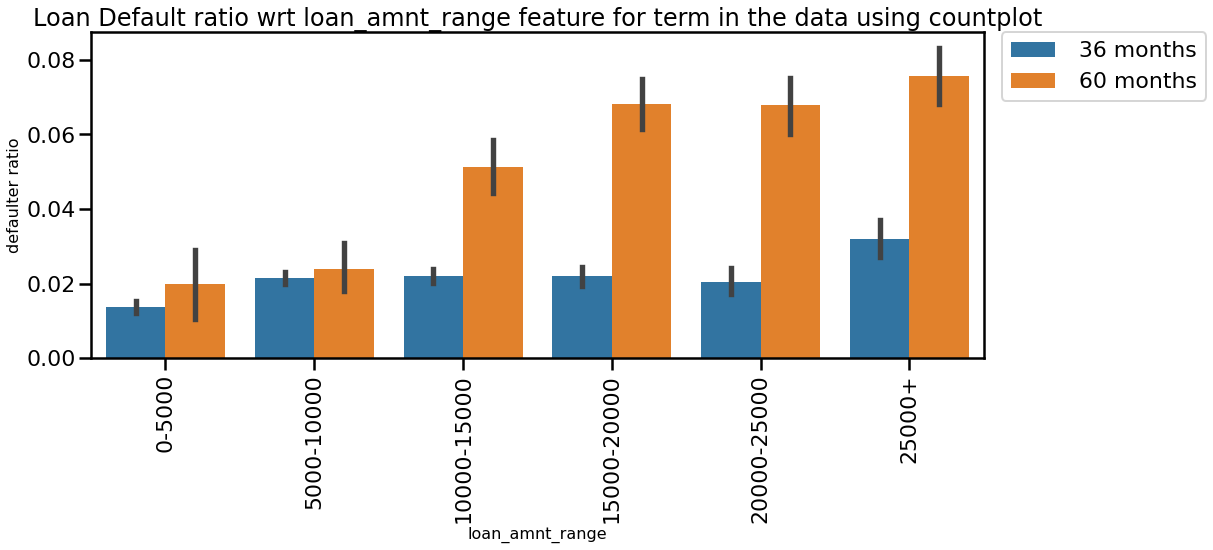

In [64]:
plotBivariateBar("loan_amnt_range", "term",xrotate=True)

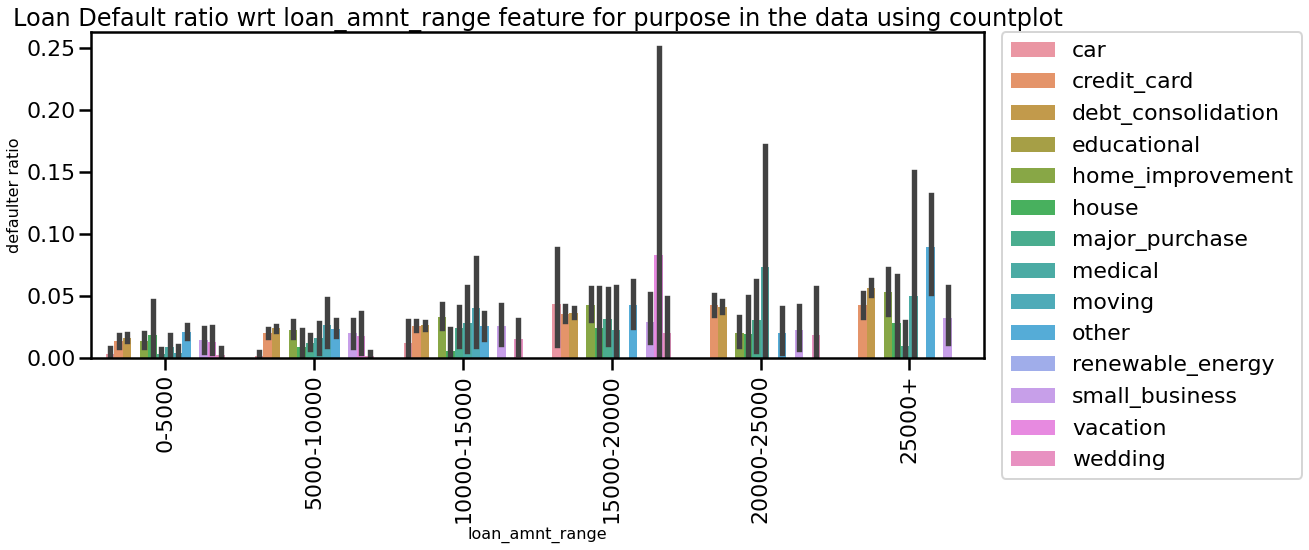

In [65]:
plotBivariateBar("loan_amnt_range", "purpose",xrotate=True)

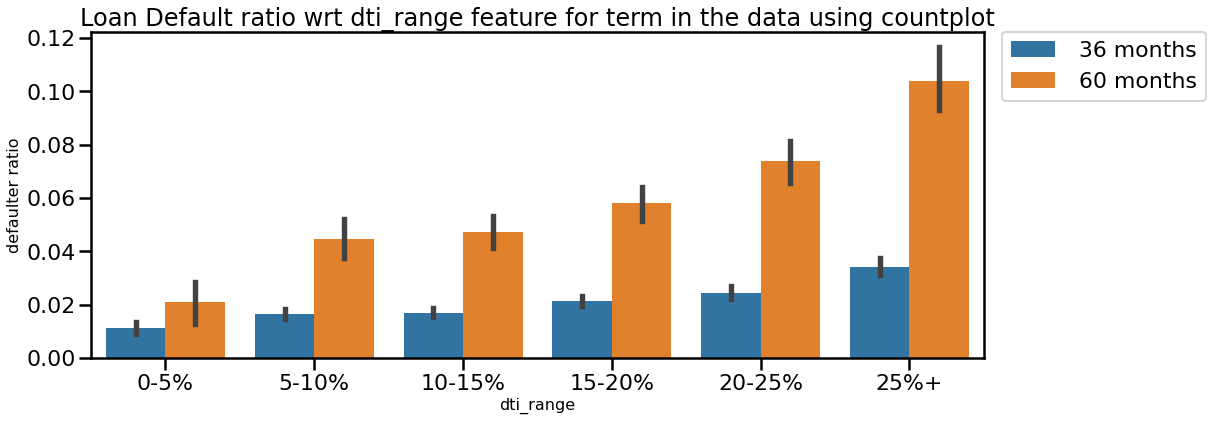

In [66]:
plotBivariateBar("dti_range", "term")

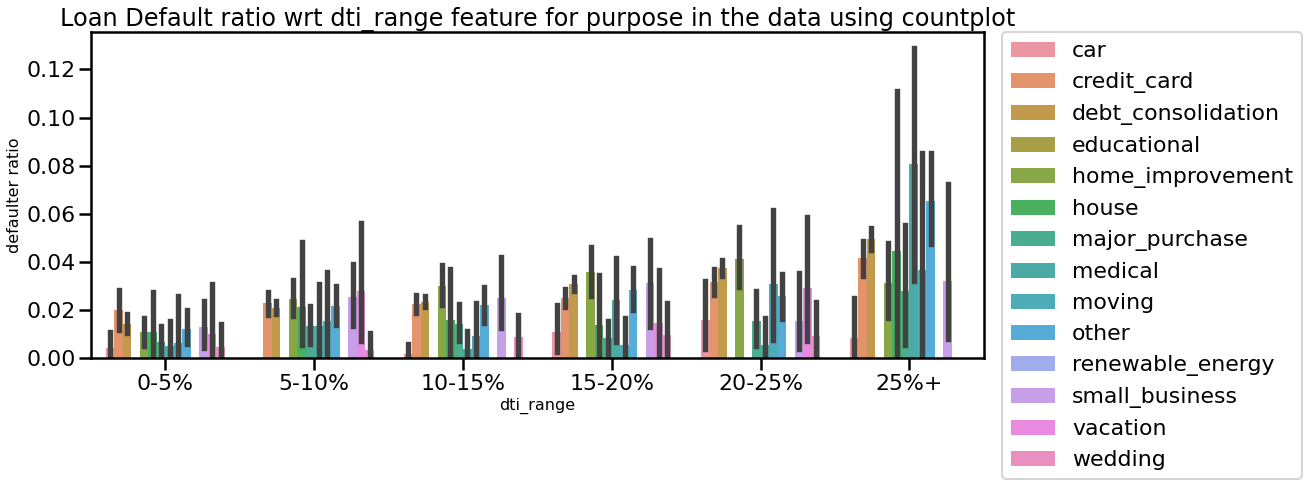

In [67]:
plotBivariateBar("dti_range", "purpose")

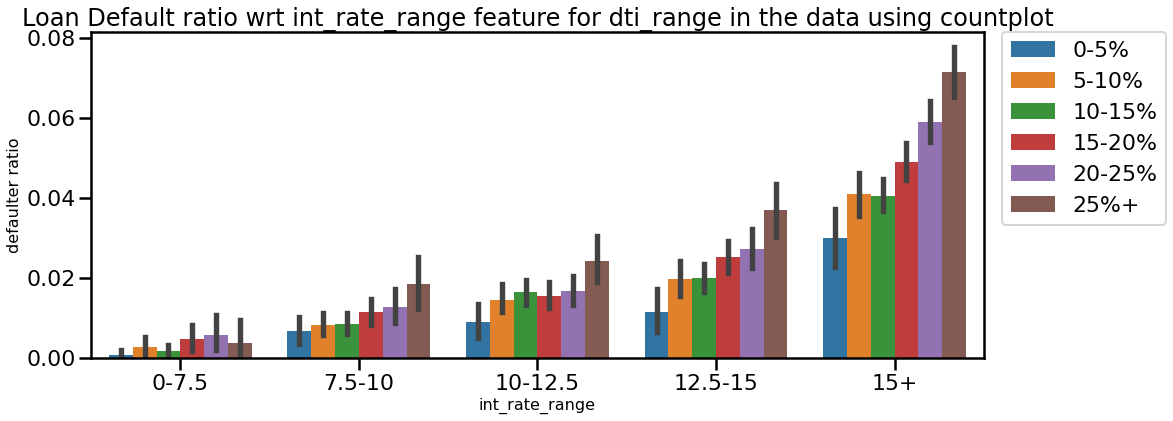

In [68]:
plotBivariateBar("int_rate_range", "dti_range")

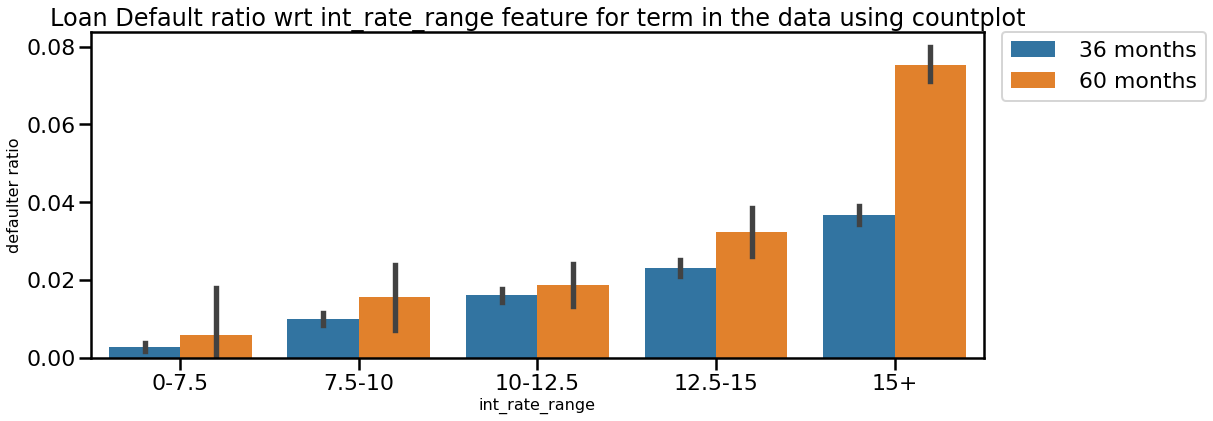

In [69]:
plotBivariateBar("int_rate_range", "term")

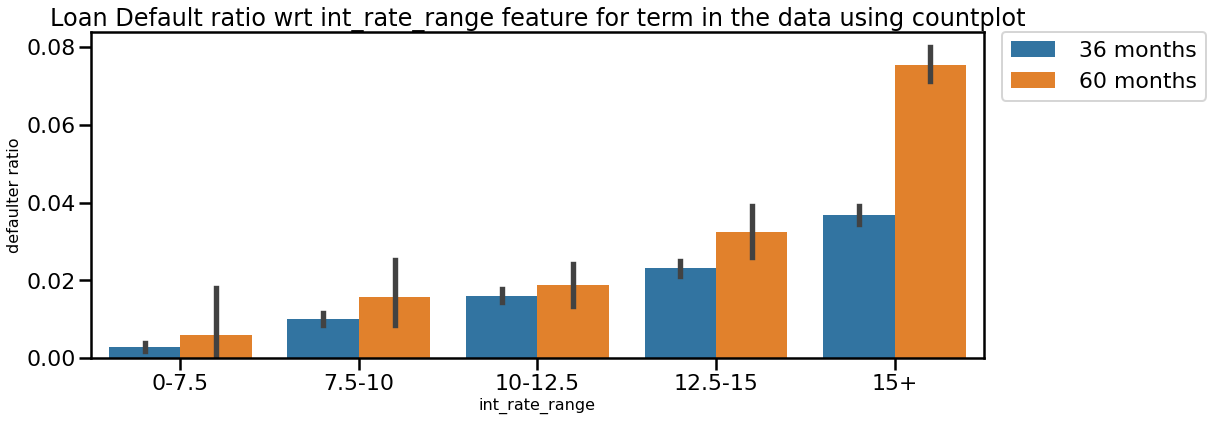

In [70]:
plotBivariateBar("int_rate_range", "term")

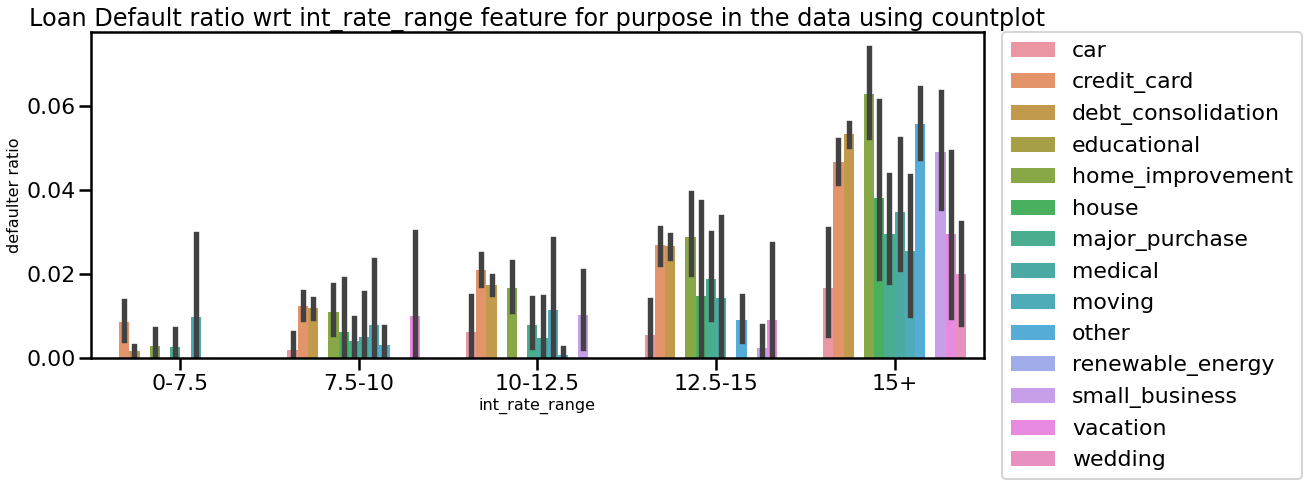

In [71]:
plotBivariateBar("int_rate_range", "purpose")

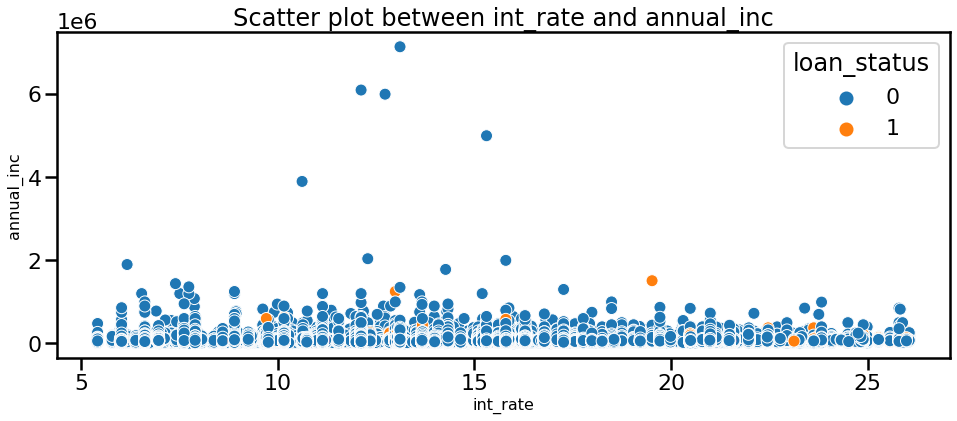

In [72]:
plotScatter("int_rate", "annual_inc")

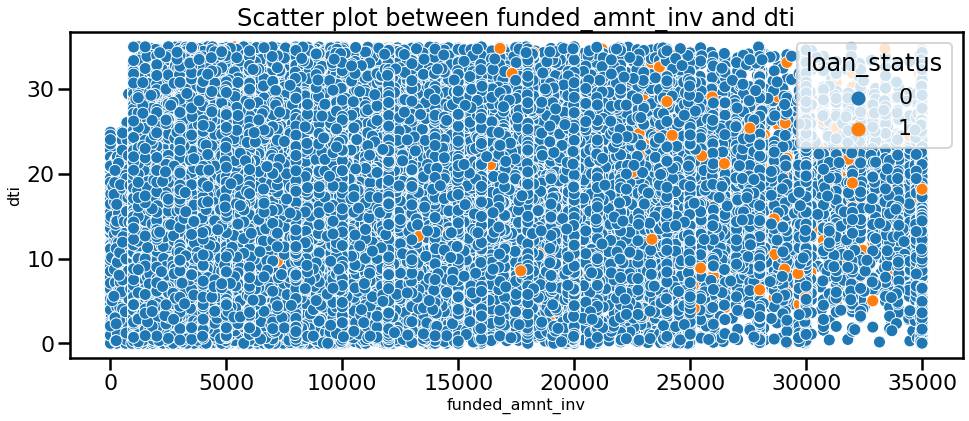

In [73]:
plotScatter("funded_amnt_inv", "dti")

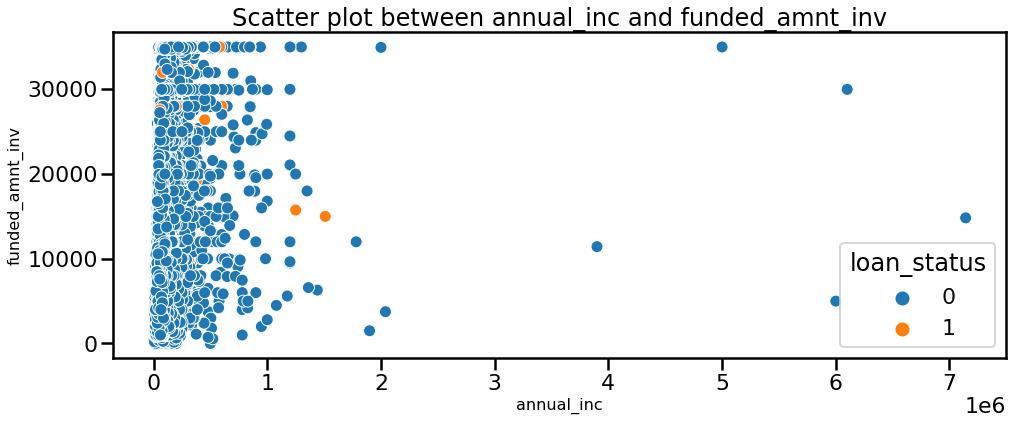

In [74]:
plotScatter("annual_inc", "funded_amnt_inv")

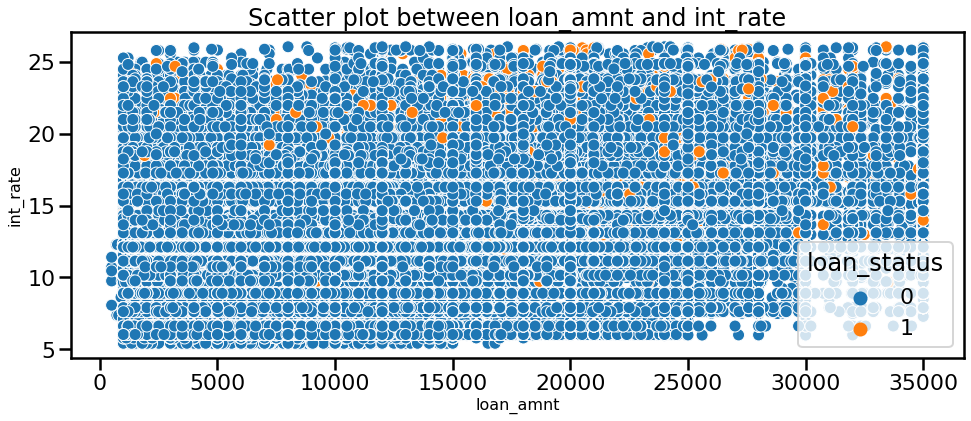

In [75]:
plotScatter("loan_amnt", "int_rate")

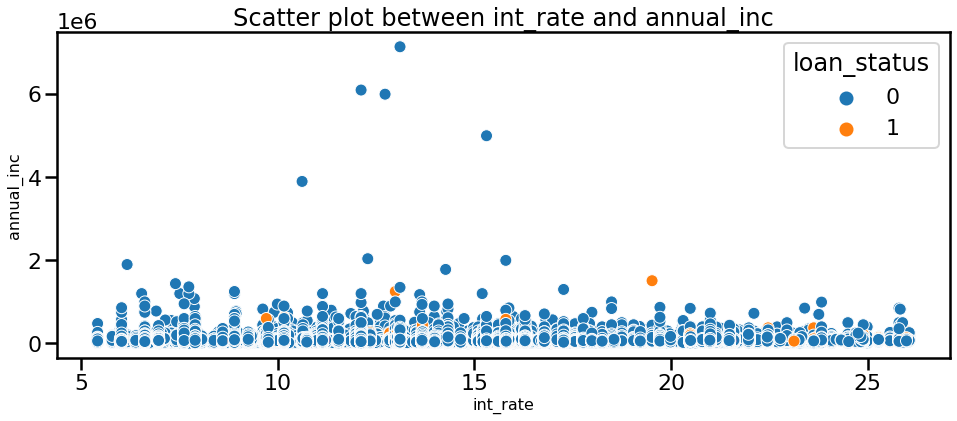

In [76]:
plotScatter("int_rate", "annual_inc")

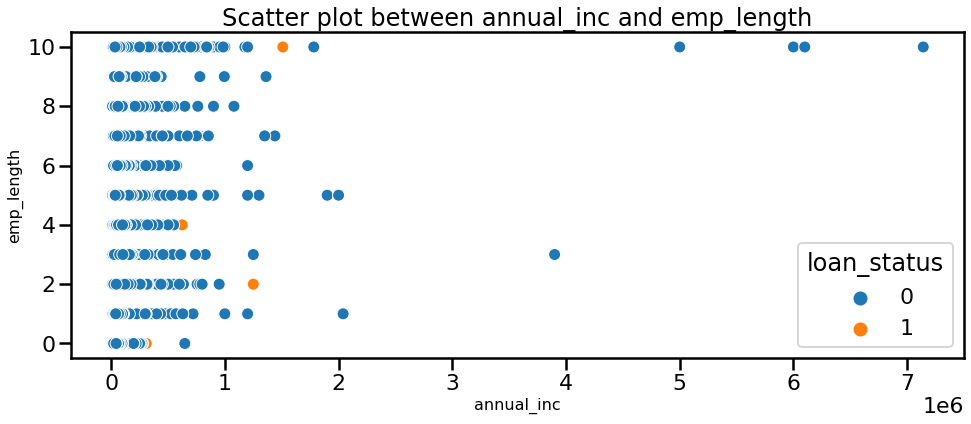

In [77]:
plotScatter("annual_inc", "emp_length")

#Plotting for two different features with respect to loan default ratio on y-axis with Box Plots and Violin Plots

In [78]:
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_status",xrotate=False):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=EDA_Df, hue=hue, order=sorted(EDA_Df[x].unique()), palette=("colorblind"))
    sns.set_context("poster")
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel(x, fontsize=16)
    if(xrotate==True):
      plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    sns.violinplot(x=x, y=y, data=EDA_Df, hue=hue, order=sorted(EDA_Df[x].unique()), palette=("colorblind"))
    sns.set_context("poster")
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel(x, fontsize=16)
    if(xrotate==True):
      plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel(y, fontsize=16)
    plt.show()

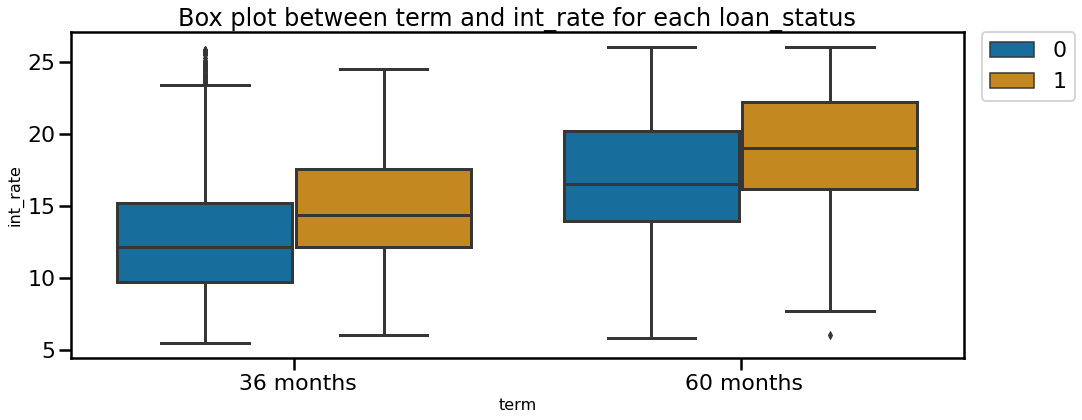

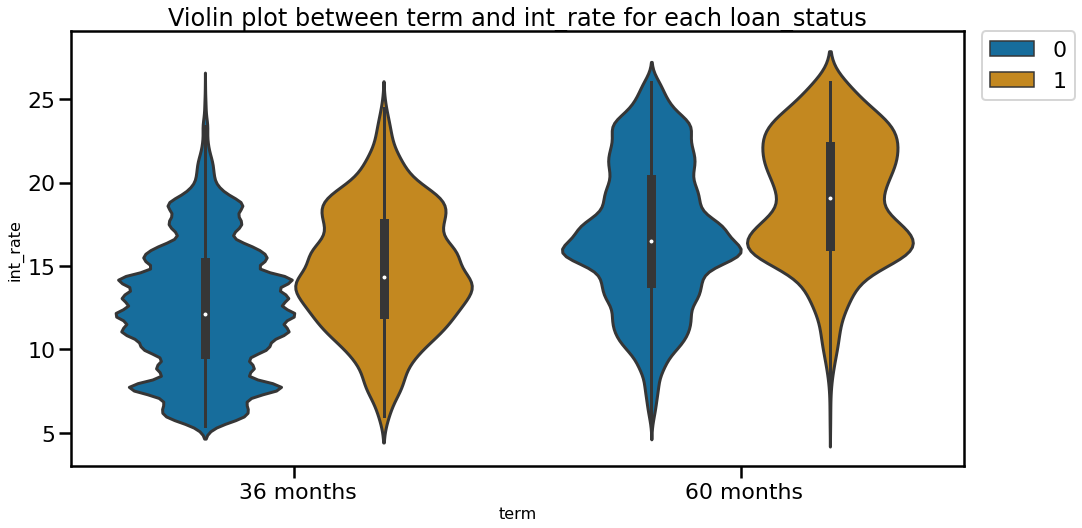

In [79]:
plotBox("term", "int_rate")

int_rate increases with term on loan and the chances of default also increases

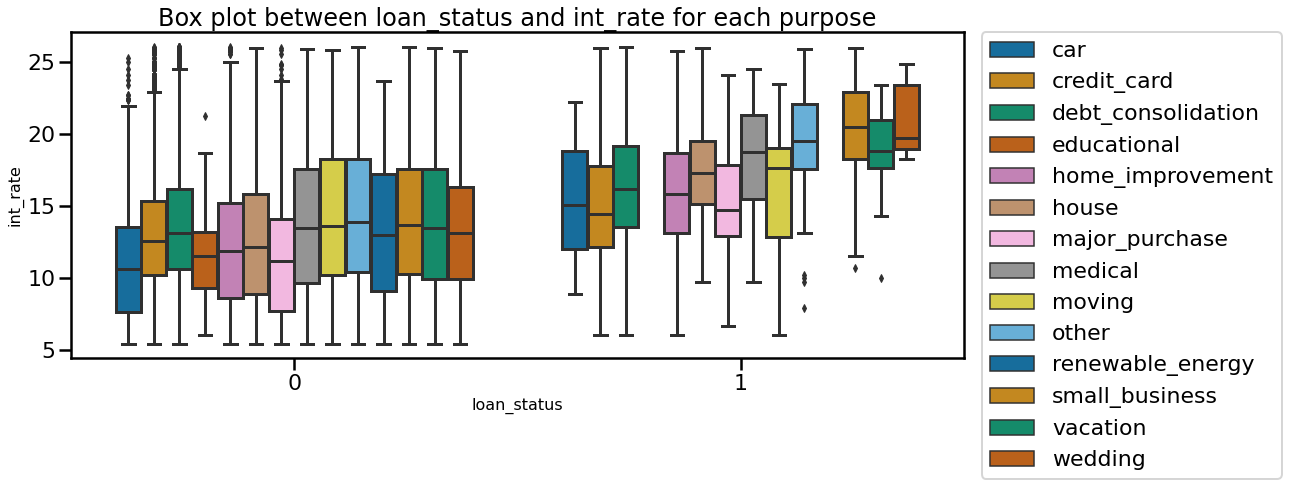

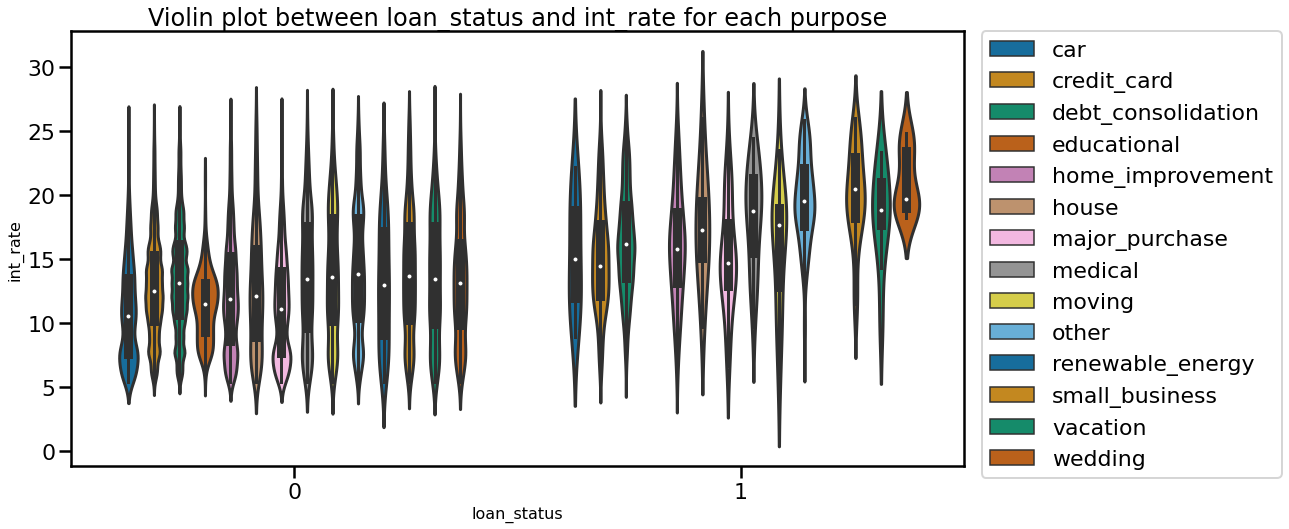

In [80]:
plotBox("loan_status", "int_rate", hue="purpose")

int_rate is quite high where the loan is defaulted for every purpose value

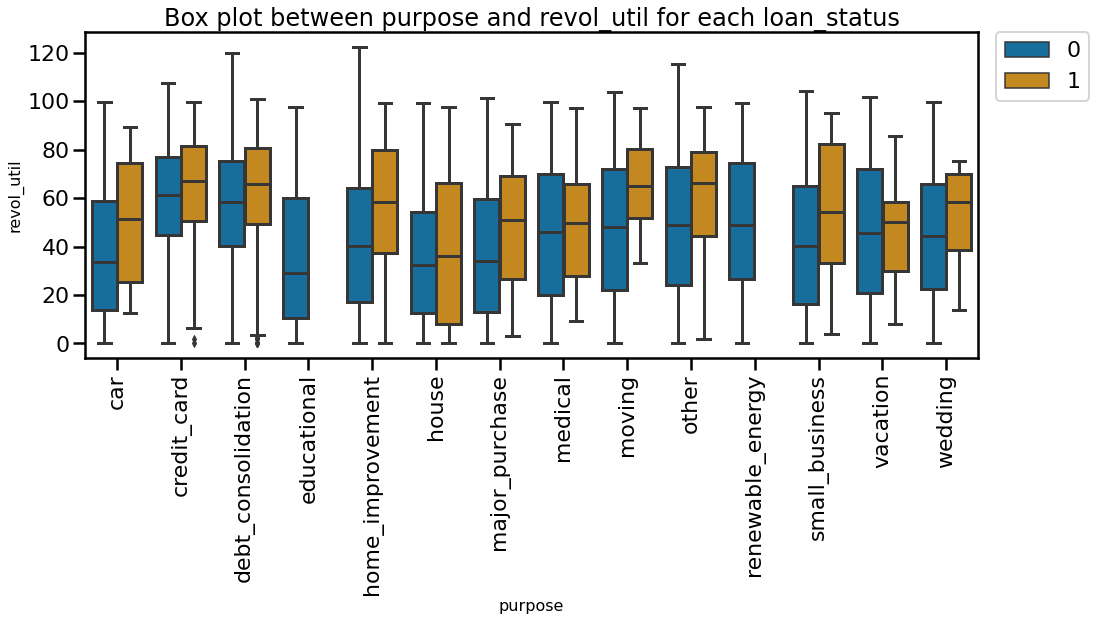

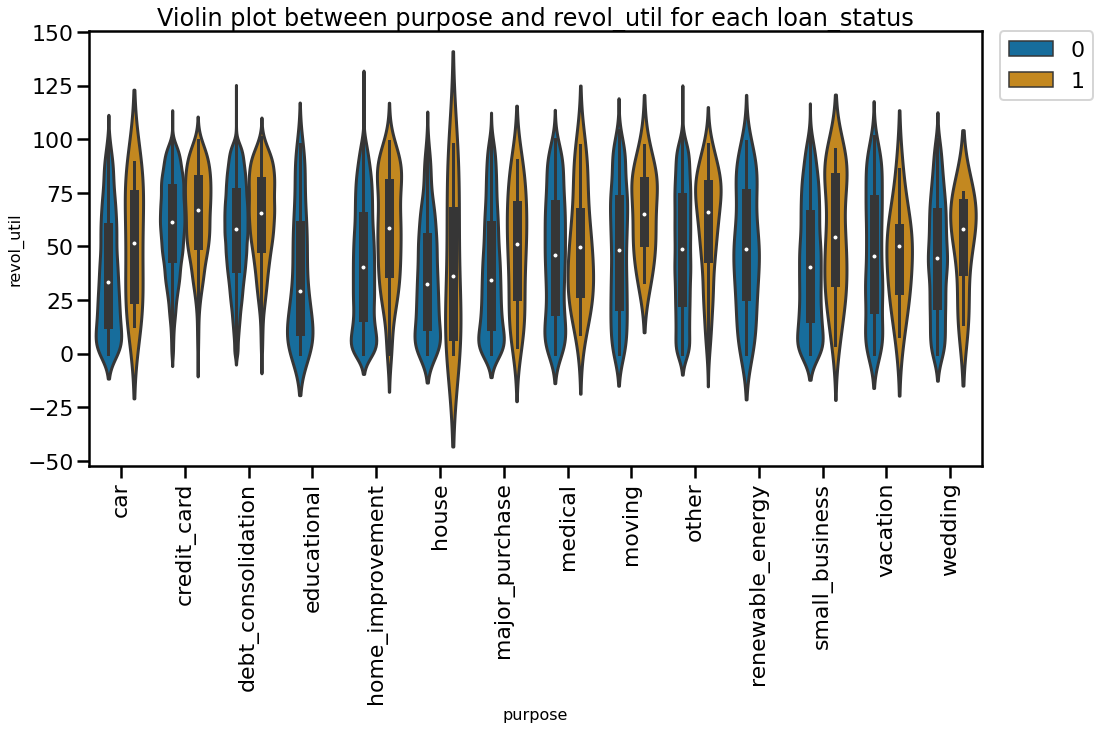

In [81]:
plotBox("purpose", "revol_util",xrotate=True)

revol_util is more for every purpose value where the loan is defaulted and quite high for credit_card

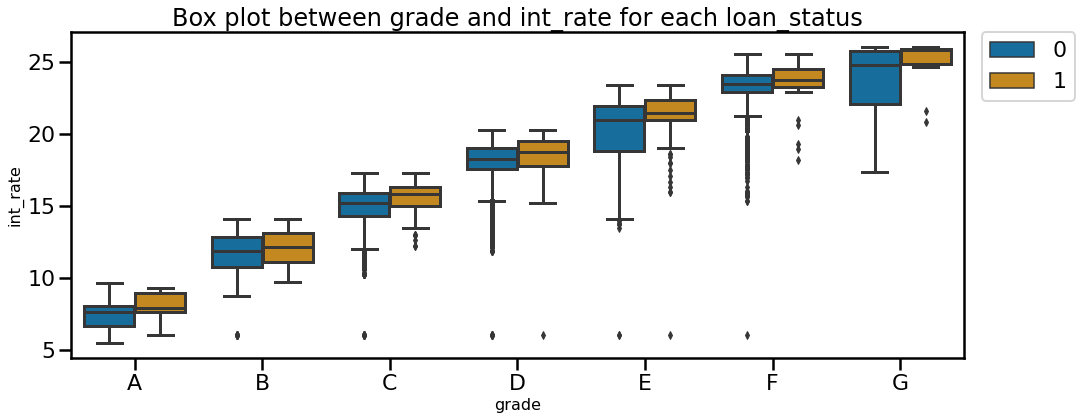

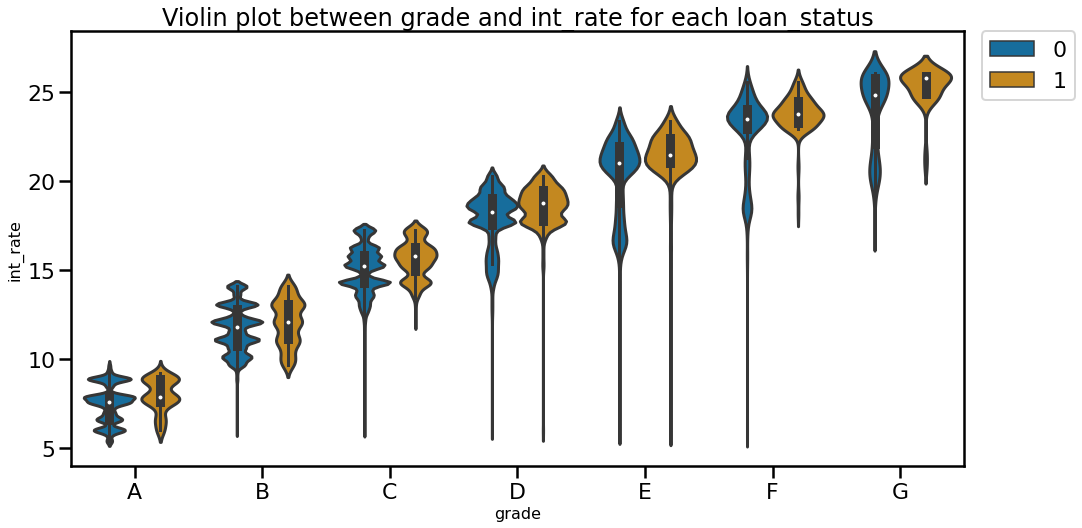

In [82]:
plotBox("grade", "int_rate", "loan_status")

#Outliers

#Box Plot Methods

In [83]:
def BoxPlot(x):
    plt.figure(figsize=(5,3))
    sns.boxplot(x=x, data=EDA_Df,  palette=("colorblind"))
    sns.set_context("poster")
    plt.title("Box plot "+x)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel(x, fontsize=16)
    plt.show()

No handles with labels found to put in legend.


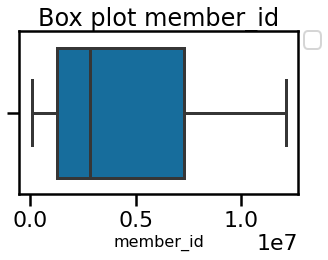

No handles with labels found to put in legend.


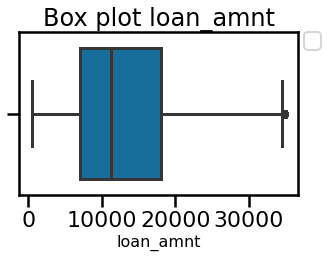

No handles with labels found to put in legend.


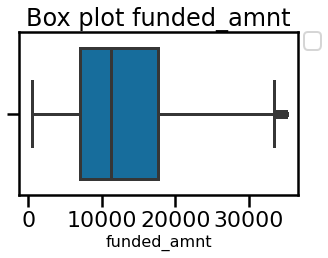

No handles with labels found to put in legend.


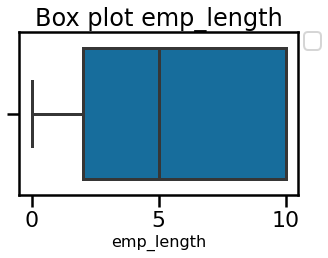

No handles with labels found to put in legend.


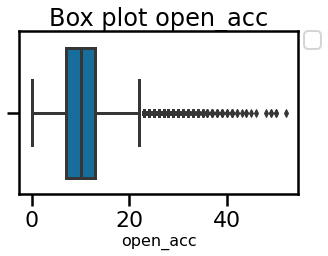

No handles with labels found to put in legend.


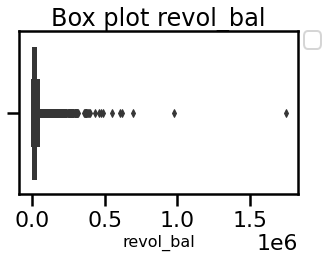

No handles with labels found to put in legend.


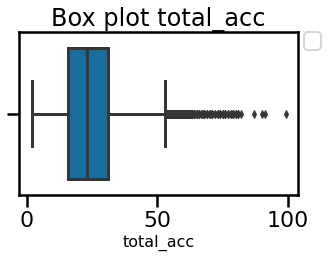

In [84]:
for col in clean_df.select_dtypes(include=["int64"]).columns:
      BoxPlot(col)

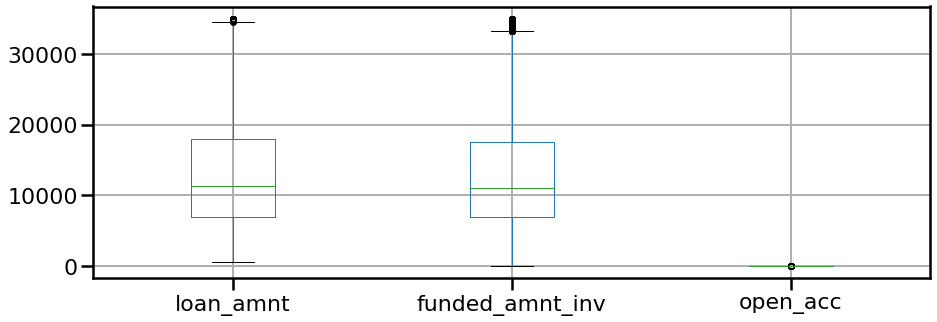

In [85]:
EDA_Df.boxplot(column=['loan_amnt', 'funded_amnt_inv', 'open_acc'])

#Box Plot

        loan_amnt  funded_amnt_inv  annual_inc  revol_bal
0            5000           4975.0     24000.0      13648
1            2400           2400.0     12252.0       2956
2           10000          10000.0     49200.0       5598
3            5000           5000.0     36000.0       7963
4            3000           3000.0     48000.0       8221
...           ...              ...         ...        ...
119140      10575          10575.0     40000.0      27668
119141       7600           7600.0     55000.0      10197
119142      17050          17050.0    103000.0      35136
119143      16750          16750.0     34000.0       8149
119144      20000          20000.0    100000.0       8252

[119145 rows x 4 columns]


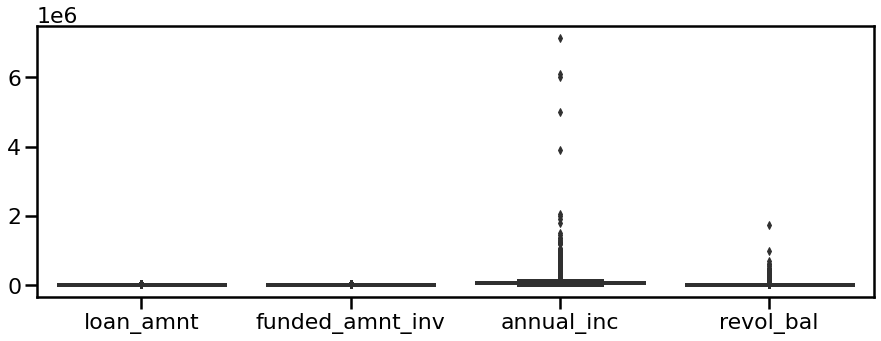

In [86]:
box_df=EDA_Df.copy()
colsToDrop = ["member_id", "funded_amnt", "term", "int_rate","installment","grade","emp_length","home_ownership",
              "purpose","addr_state","loan_status","loan_amnt_range","int_rate_range","annual_inc_range","dti_range",
             "total_acc" ,"dti","open_acc","revol_util"]
box_df.drop(colsToDrop, axis=1, inplace=True)
box_df.reset_index(drop=True, inplace=True)

print(box_df)
sns.boxplot(data=box_df,orient="v" , palette=("colorblind"))
sns.set_context("poster")

#Violin Plot

In [87]:
def ViolinPlot(x):
  plt.figure(figsize=(5,3))
  sns.violinplot(x=x, data=EDA_Df, palette=("colorblind"))
  sns.set_context("poster")
  plt.title("Violin plot between "+x)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xlabel(x, fontsize=16)
  plt.show()

No handles with labels found to put in legend.


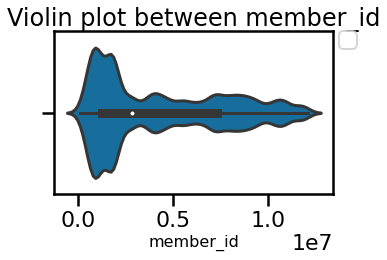

No handles with labels found to put in legend.


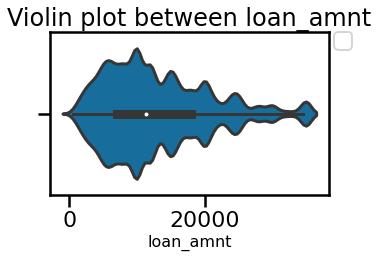

No handles with labels found to put in legend.


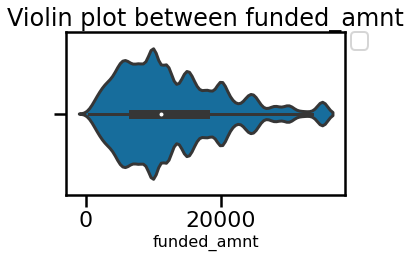

No handles with labels found to put in legend.


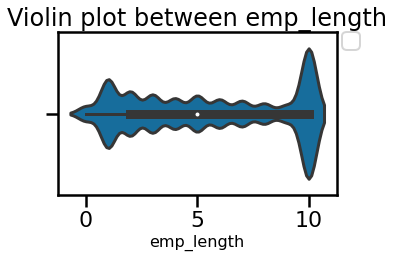

No handles with labels found to put in legend.


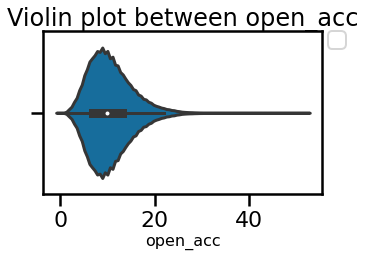

No handles with labels found to put in legend.


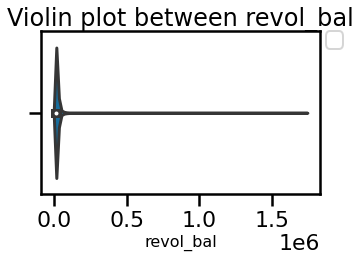

No handles with labels found to put in legend.


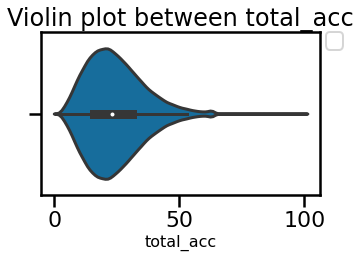

In [88]:
for col in clean_df.select_dtypes(include=["int64"]).columns:
      ViolinPlot(col)

In [89]:
Anomaly_df= pd.read_csv('/content/drive/MyDrive/Capstone Project/Data Files/Bank Loan Default_anamoly.csv')
Anomaly_df.shape
Anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83402 entries, 0 to 83401
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       83402 non-null  int64  
 1   member_id        83402 non-null  int64  
 2   loan_amnt        83402 non-null  int64  
 3   funded_amnt      83402 non-null  int64  
 4   funded_amnt_inv  83402 non-null  float64
 5   term             83402 non-null  object 
 6   int_rate         83402 non-null  float64
 7   installment      83402 non-null  float64
 8   grade            83402 non-null  object 
 9   emp_length       83402 non-null  int64  
 10  home_ownership   83402 non-null  object 
 11  annual_inc       83402 non-null  float64
 12  purpose          83402 non-null  object 
 13  addr_state       83402 non-null  object 
 14  dti              83402 non-null  float64
 15  open_acc         83402 non-null  int64  
 16  revol_bal        83402 non-null  int64  
 17  revol_util  

In [90]:
Anomaly_df = Anomaly_df[['loan_status','Anomaly','Anomaly_Score']]
Anomaly_df.shape
Anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83402 entries, 0 to 83401
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    83402 non-null  object 
 1   Anomaly        83402 non-null  int64  
 2   Anomaly_Score  83402 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ MB


In [91]:
Anomaly_df = Anomaly_df[Anomaly_df.loan_status != 'Fully Paid']

In [92]:
Anomaly_df.shape
Anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 15 to 83401
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    2339 non-null   object 
 1   Anomaly        2339 non-null   int64  
 2   Anomaly_Score  2339 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 73.1+ KB


In [93]:
def plotBivariateBarAnamoly(y, hue, figsize=(16,6),xrotate=False):
    plt.figure(figsize=figsize)
    sns.barplot(x='loan_status', y=y, hue=hue, data=Anomaly_df)
    plt.title("Loan Default ratio wrt "+y+" feature for "+hue+" in the data using countplot")
    plt.xlabel('loan_status', fontsize=16)
    if(xrotate==True):
      plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel(y=y, fontsize=16)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

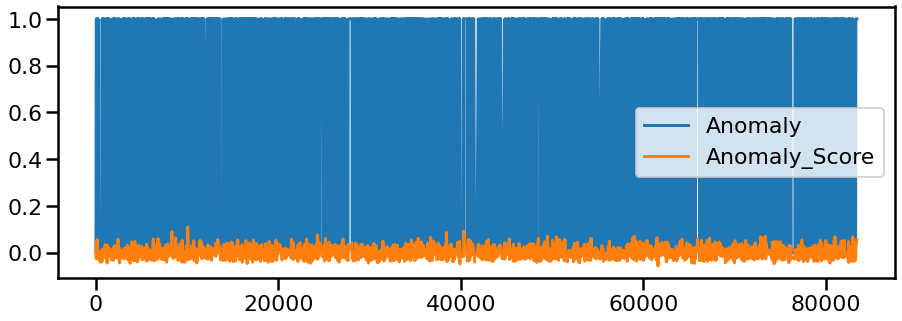

In [94]:
Anomaly_df.plot()

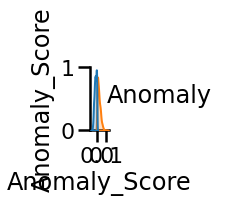

In [95]:
sns.pairplot(Anomaly_df, hue = "Anomaly")

In [96]:
Anomaly_df.head()

loan_status  Anomaly  Anomaly_Score
15      Default        0      -0.023818
46      Default        1       0.027966
155     Default        1       0.055028
193     Default        0      -0.010889
242     Default        0      -0.027739

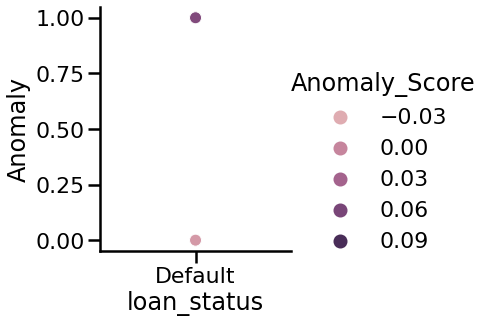

In [97]:
sns.relplot(x="loan_status", y="Anomaly", hue="Anomaly_Score", data=Anomaly_df);